# FixationGrower Initial Plots

**Goal**: Given new trials table, see how multi-day plotting works with FixationGrower protocol and make any updates as needed. 

**Notes**: May need to consider making a new visualization class for this purpose, or at least some visualization logic that utilizes the "protocol" field of the trials table.

In [102]:
import sys

sys.path.append("../")

import behav_viz.ingest as ingest
import behav_viz.visualize as viz

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from behav_viz.utils import plot_utils as pu
from behav_viz.visualize.df_preperation import *
sns.set_context("talk")


%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
animal_id = ["R010"]
date_min = "2024-07-19"
date_max = "2024-07-28"

# Create a dataframe with all the trials
trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_id, date_min, date_max
)
days_df = ingest.create_days_df.create_days_df_from_dj(animal_id, date_min, date_max)

animal_id R010


[2024-08-02 17:39:55,325][WARNING]: MySQL server has gone away. Reconnecting to the server.


Fetched 10 dates from Sessions table from 2024-07-19 to 2024-07-28 for R010



In [3]:
animal_id = ["R012"]
date_min = "2024-07-19"

# Create a dataframe with all the trials
trials_df2 = ingest.create_trials_df.create_trials_df_from_dj(animal_id, date_min)
days_df2 = ingest.create_days_df.create_days_df_from_dj(animal_id, date_min)

animal_id R012
Fetched 15 dates from Sessions table from 2024-07-19 to 2024-08-02 for R012



# Summaries over days

In [5]:
for (date, animal_id), sub_df in trials_df.groupby(["date", "animal_id"]):
    pass

What it would look like with old DMS2 protocol:

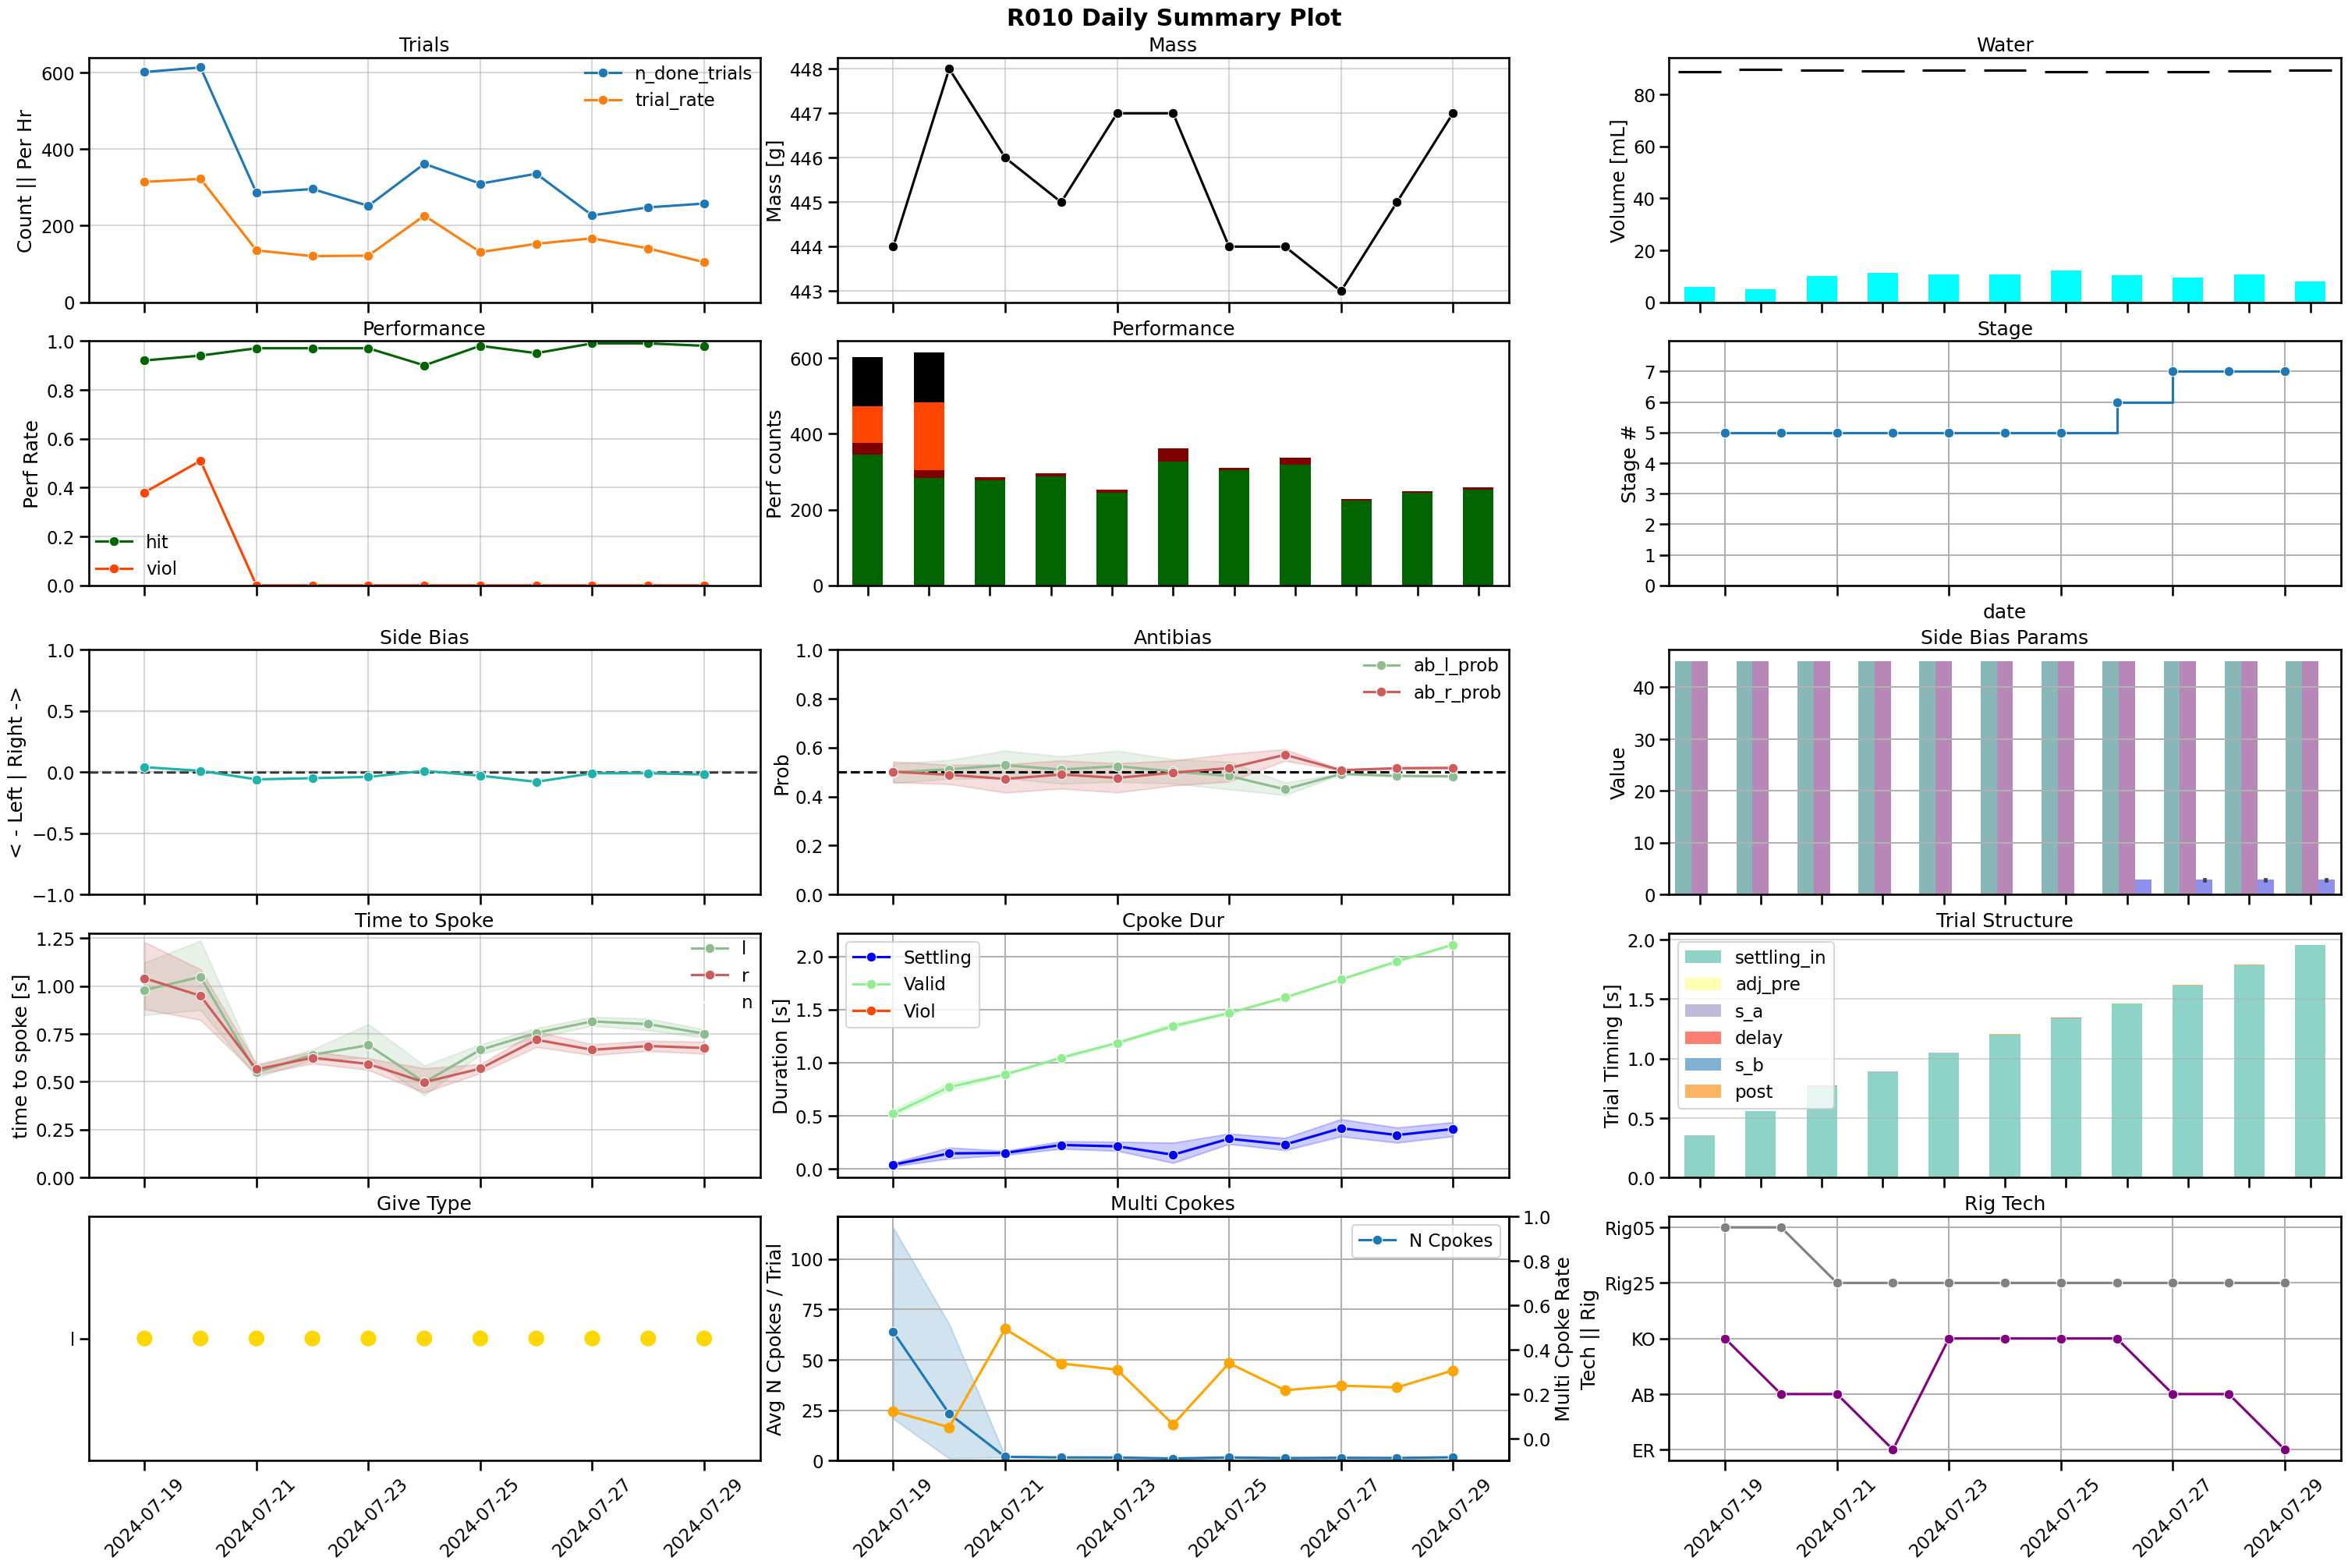

In [6]:
viz.summarize.over_days_summaries(animal_id, days_df, trials_df)

New version for cpoking:


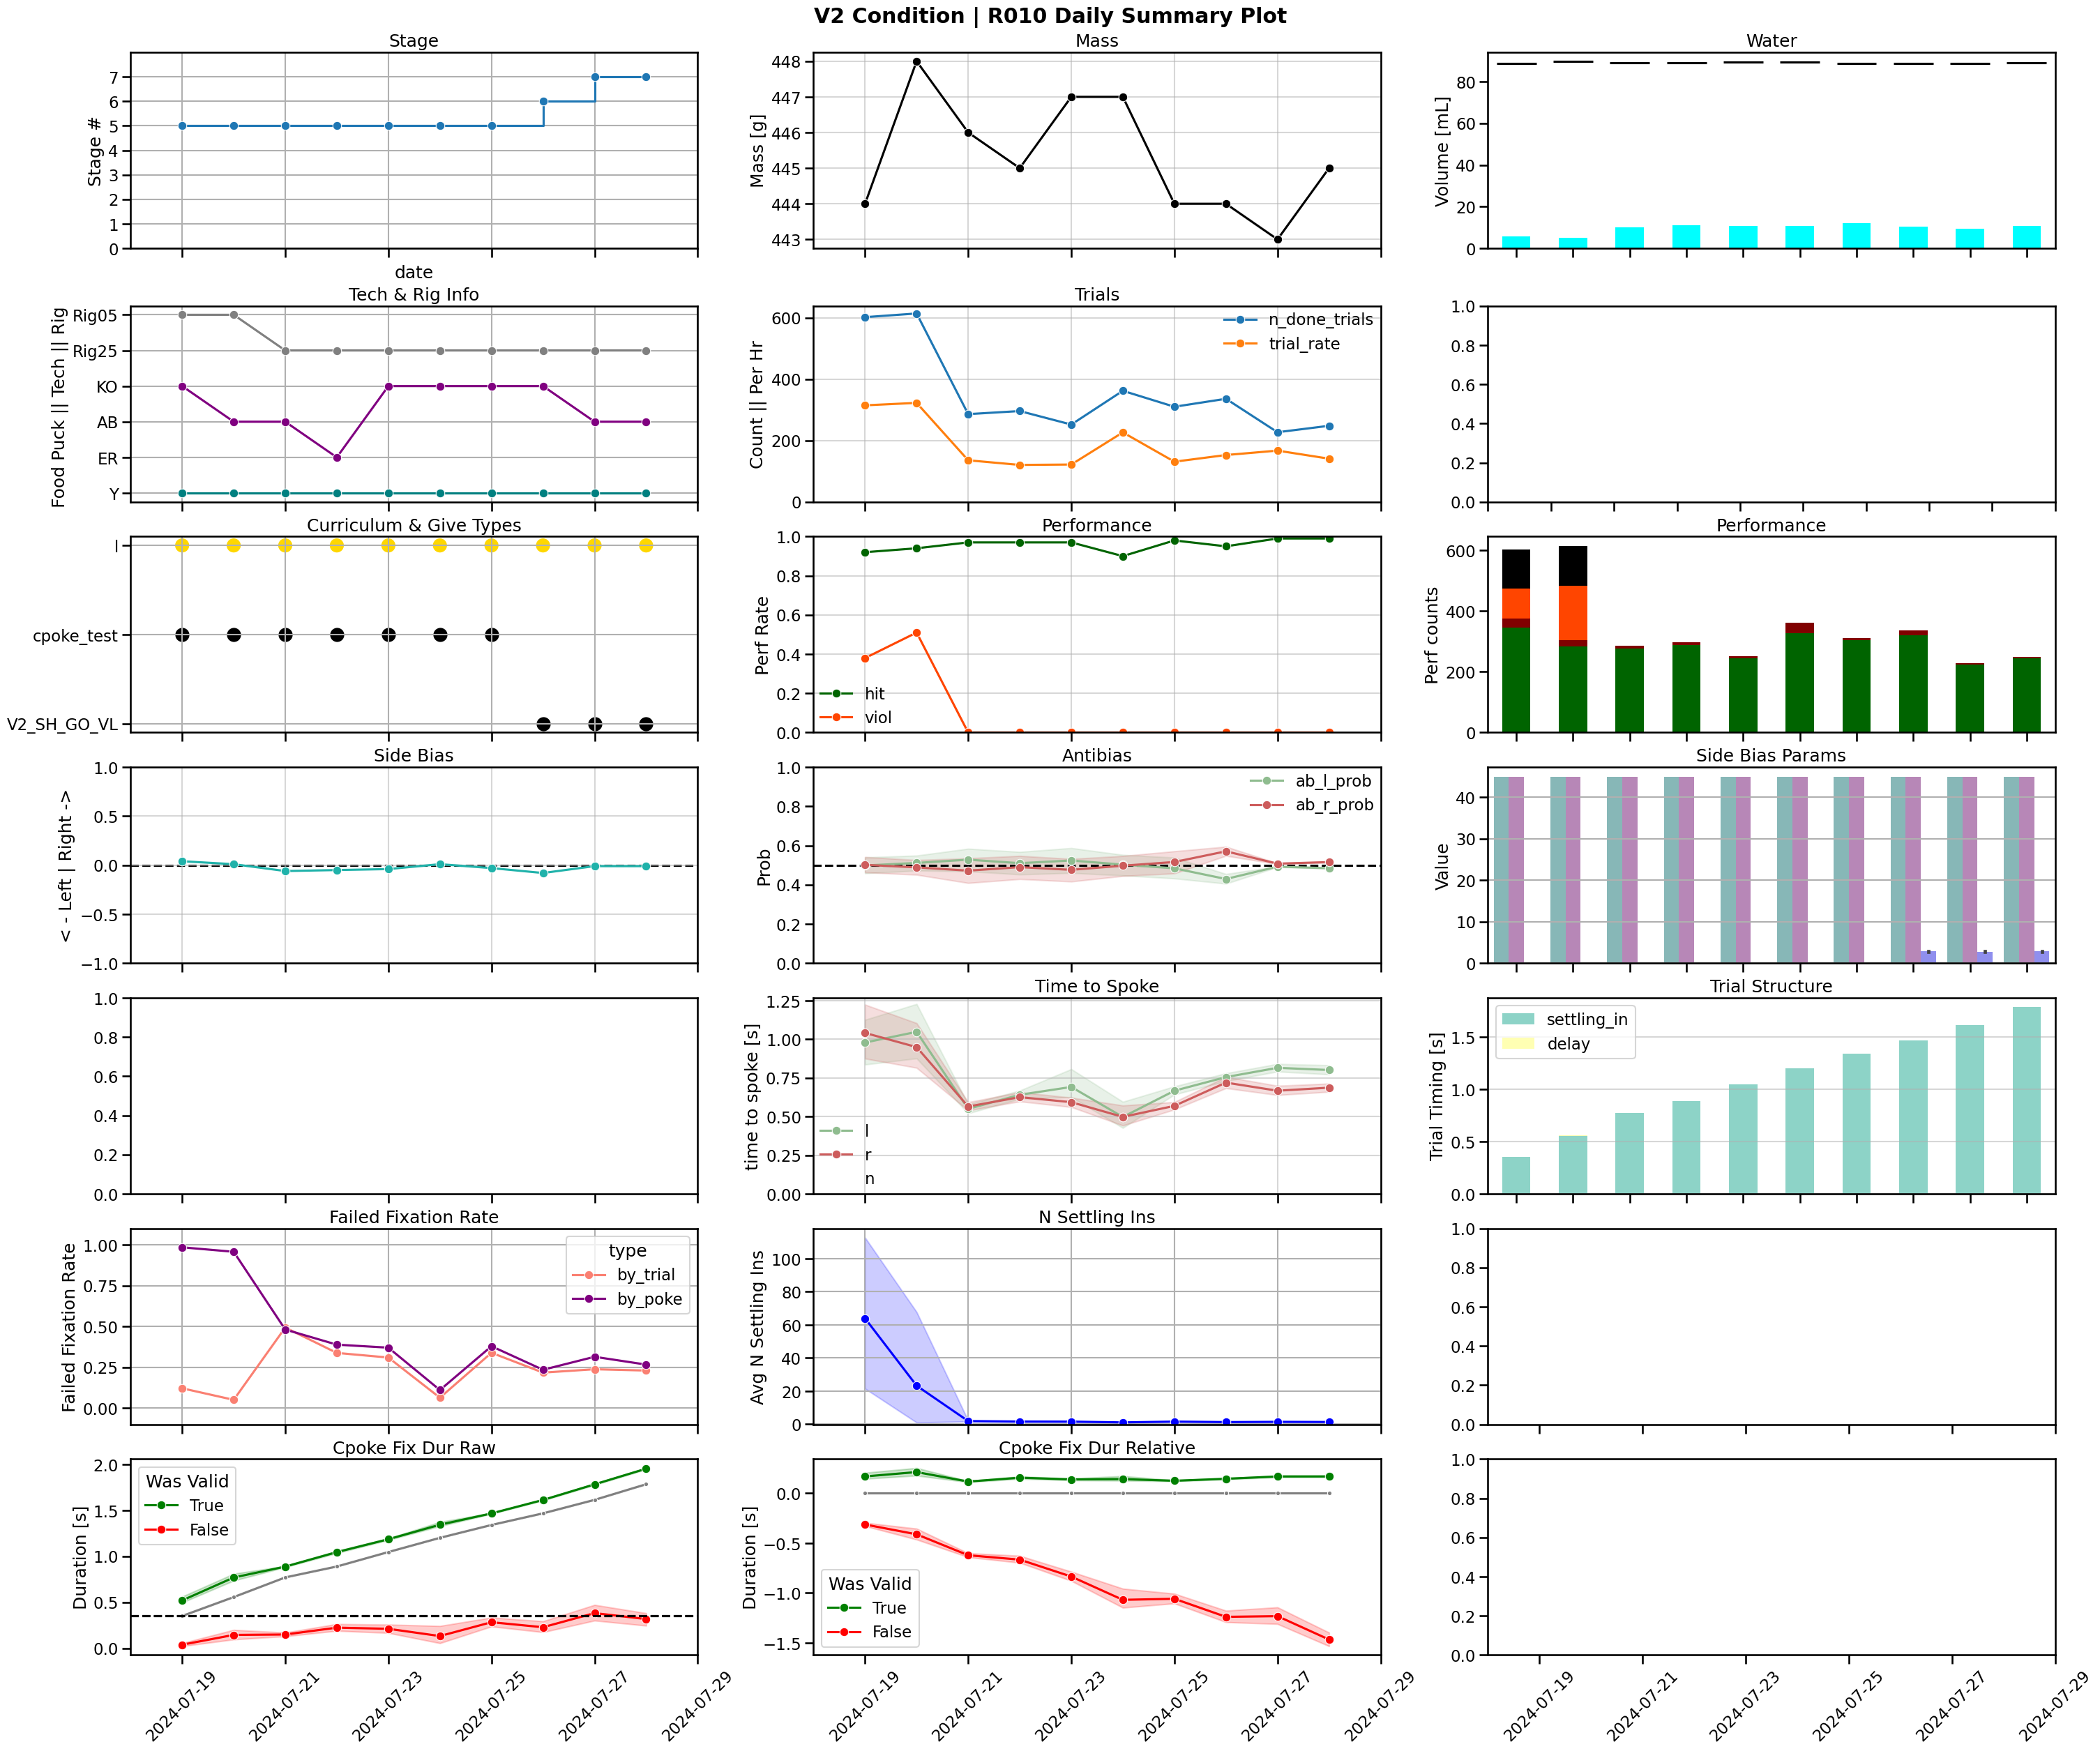

In [113]:
viz.FixationGrower.multiplots.over_days_summary_cpoke_learning(
    "R010", days_df, trials_df
)

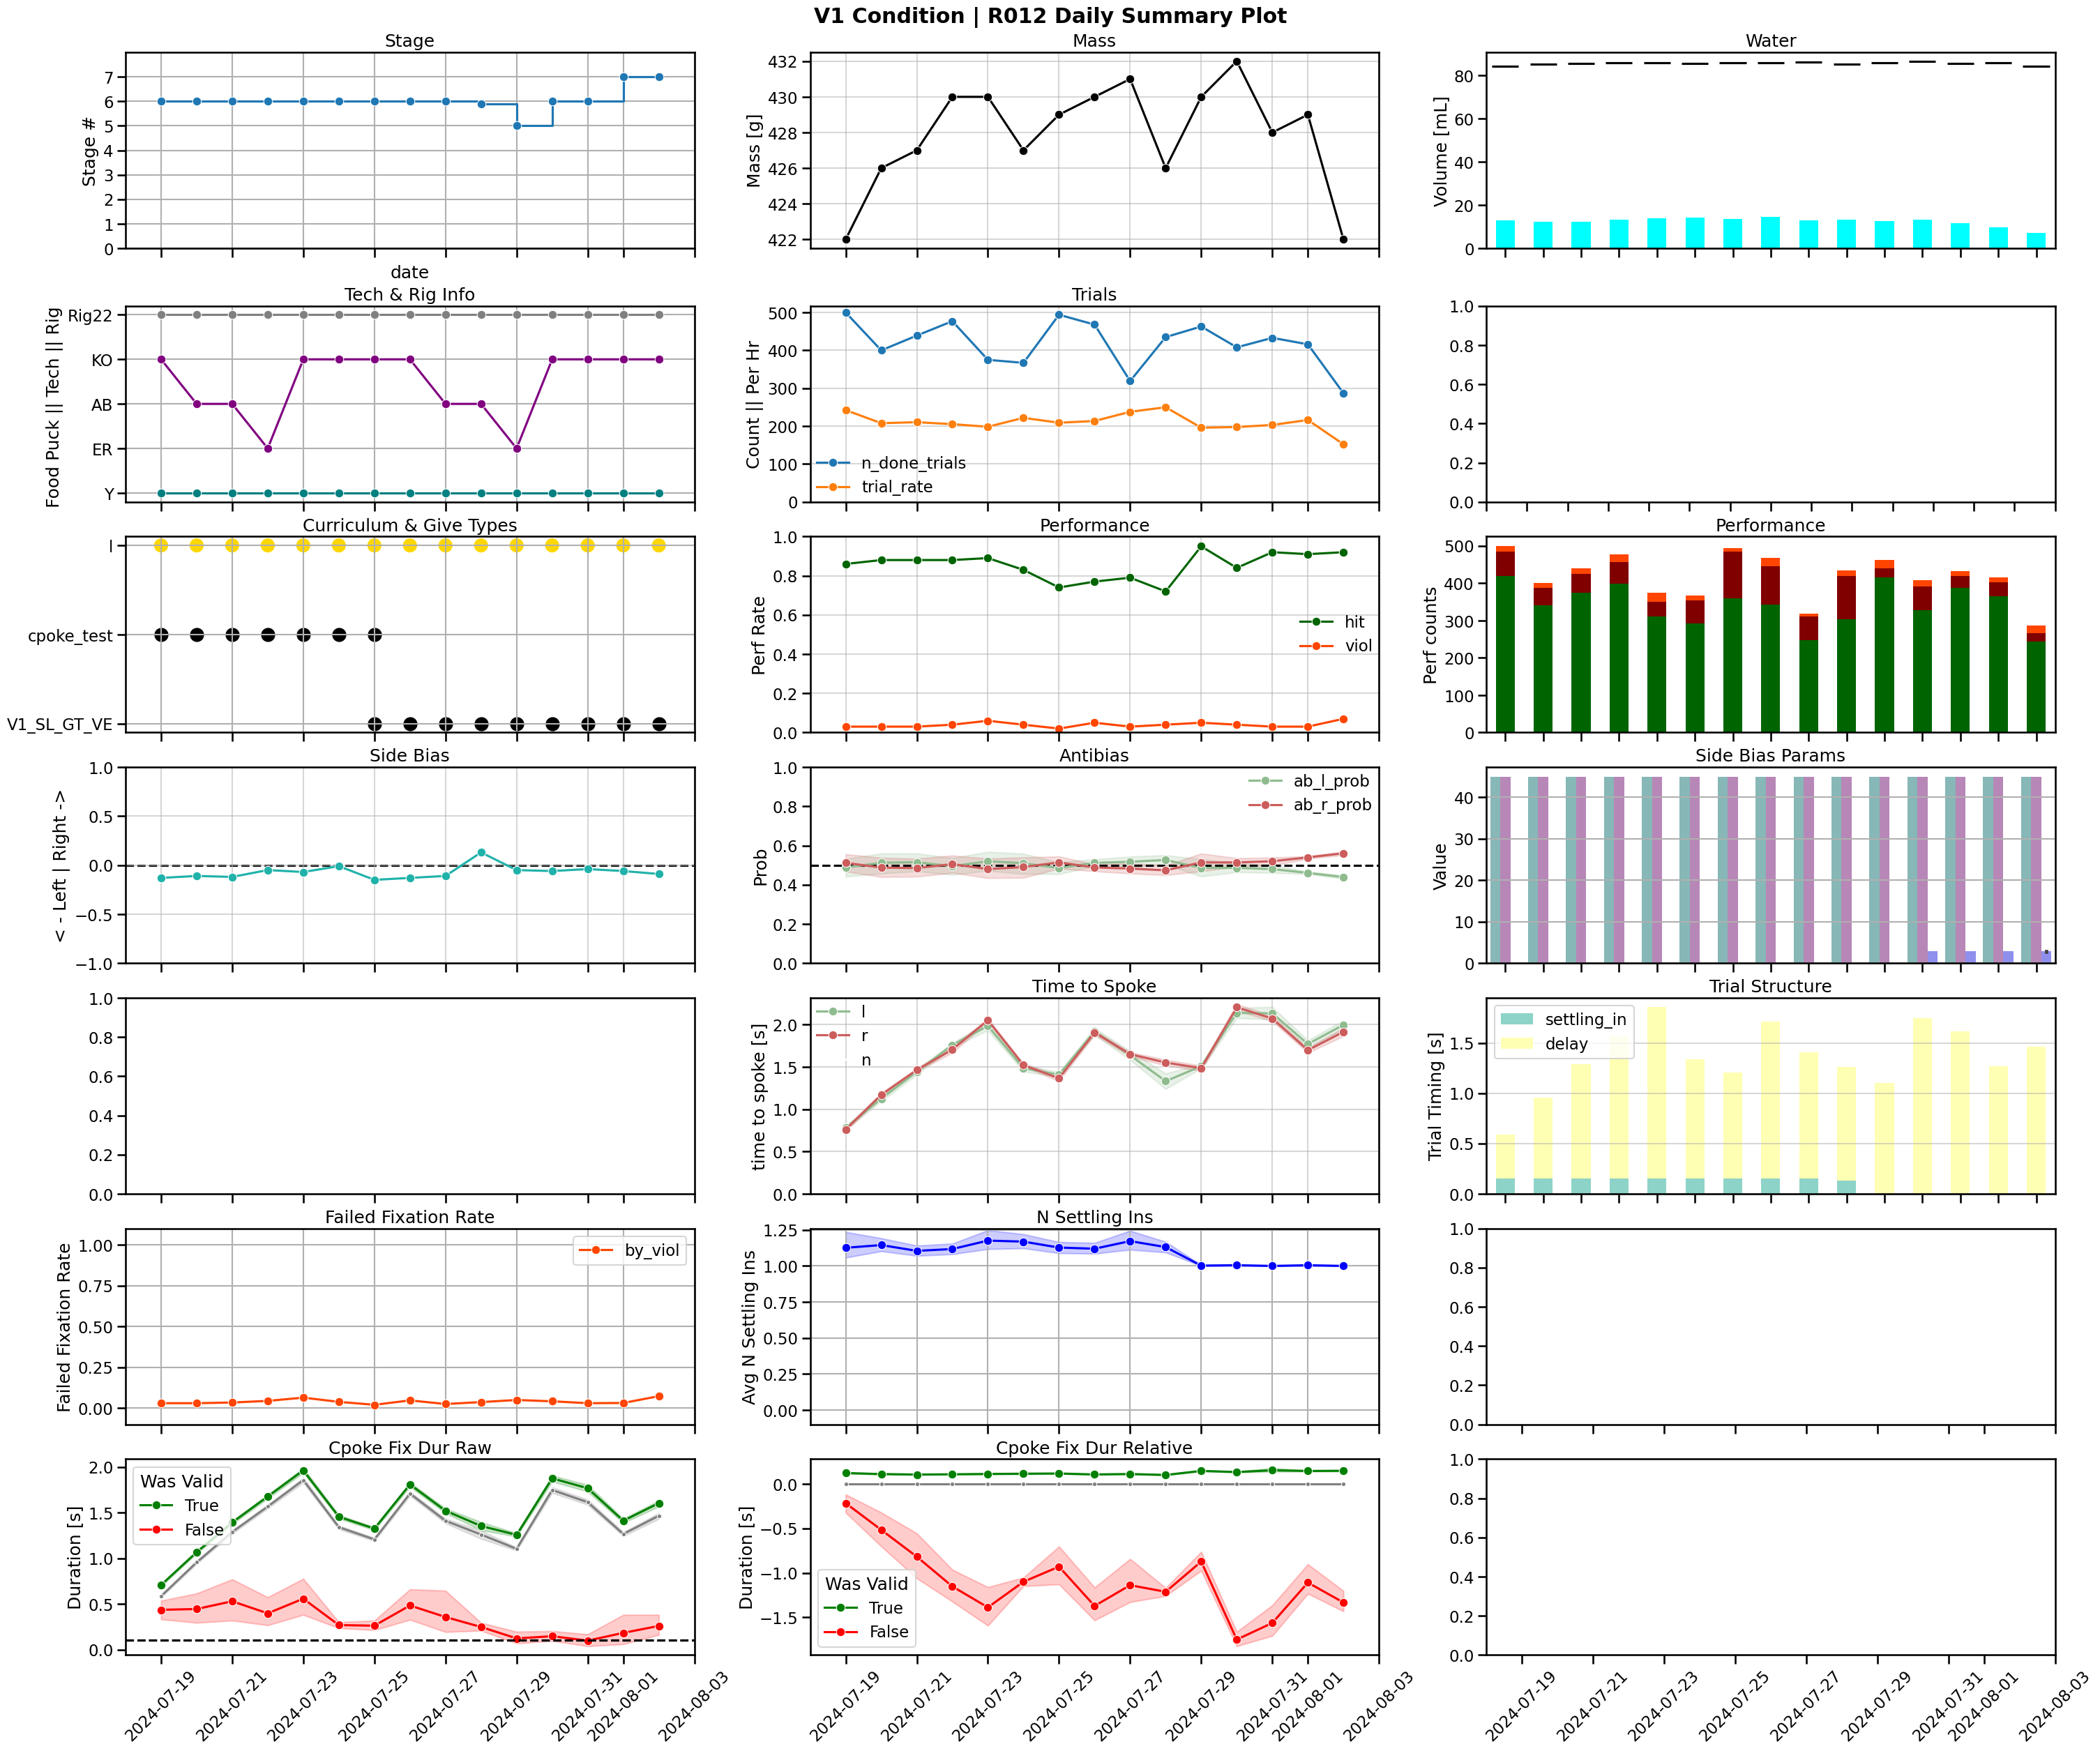

In [110]:
viz.FixationGrower.multiplots.over_days_summary_cpoke_learning(
    "R012", days_df2, trials_df2
)

Spoking Version

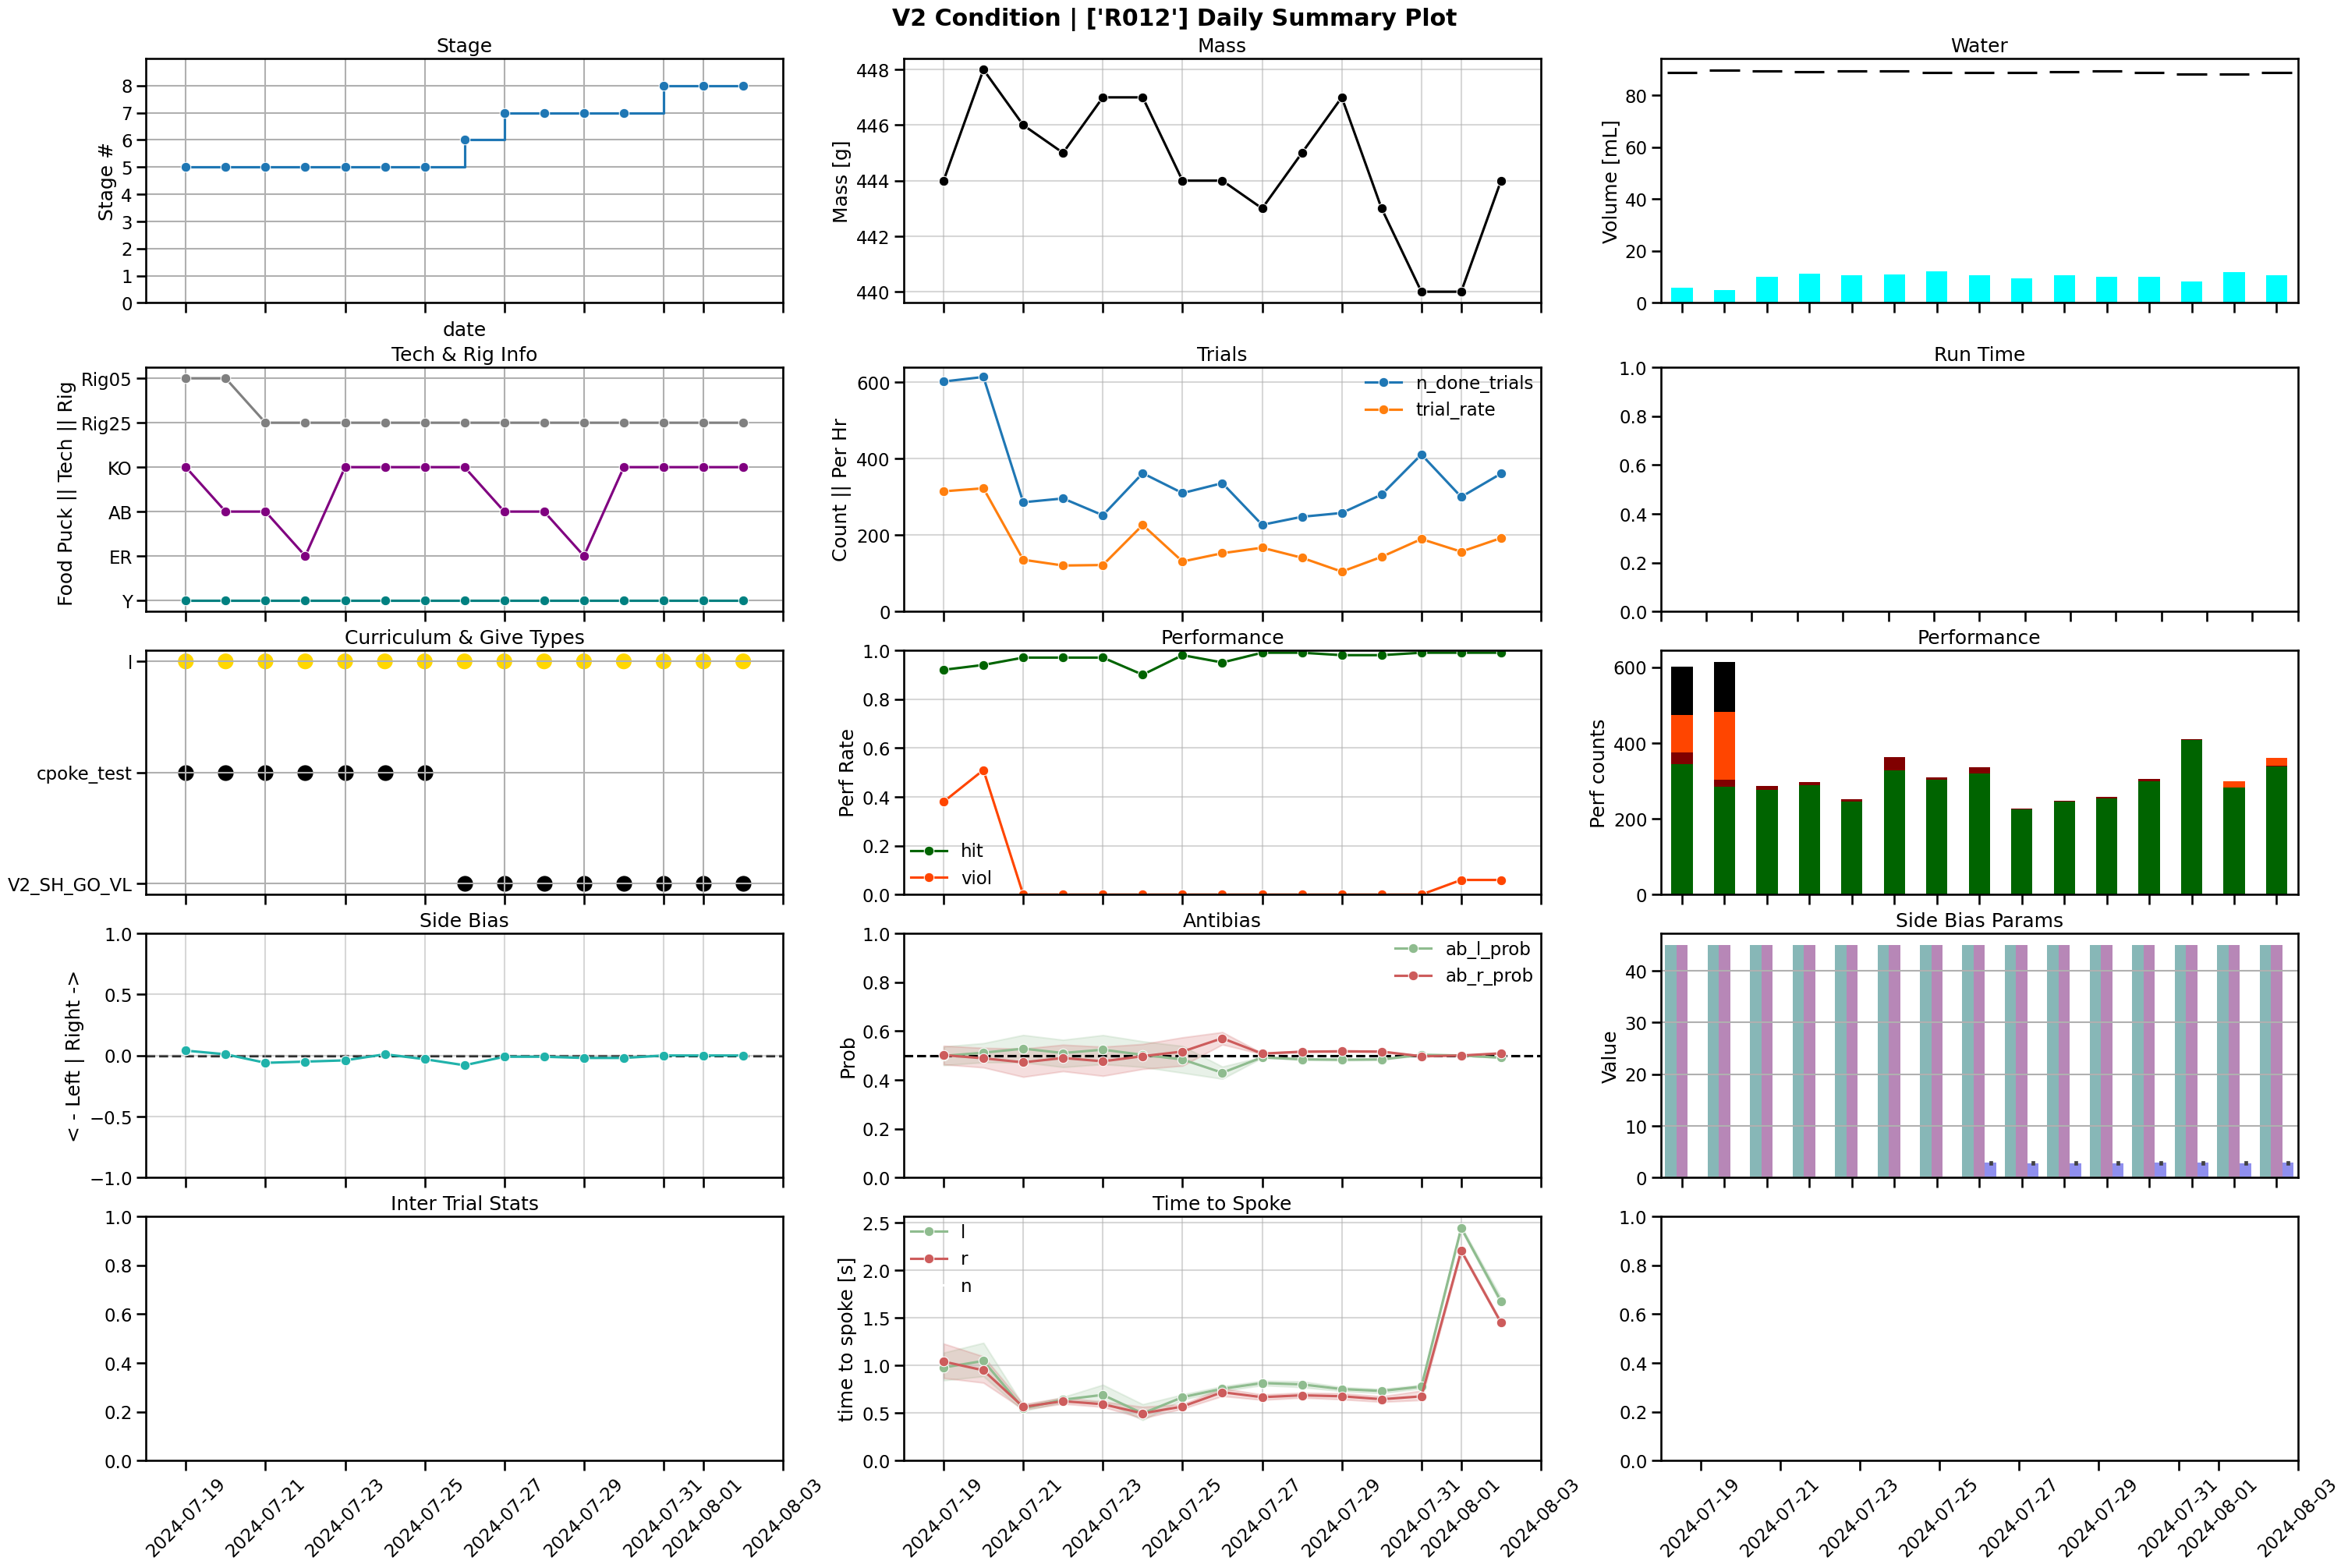

In [109]:
viz.FixationGrower.multiplots.over_days_summary_spoke(animal_id, days_df, trials_df)

### Single Plot Dev


#### Plot Rig/Tech/Foodpuck

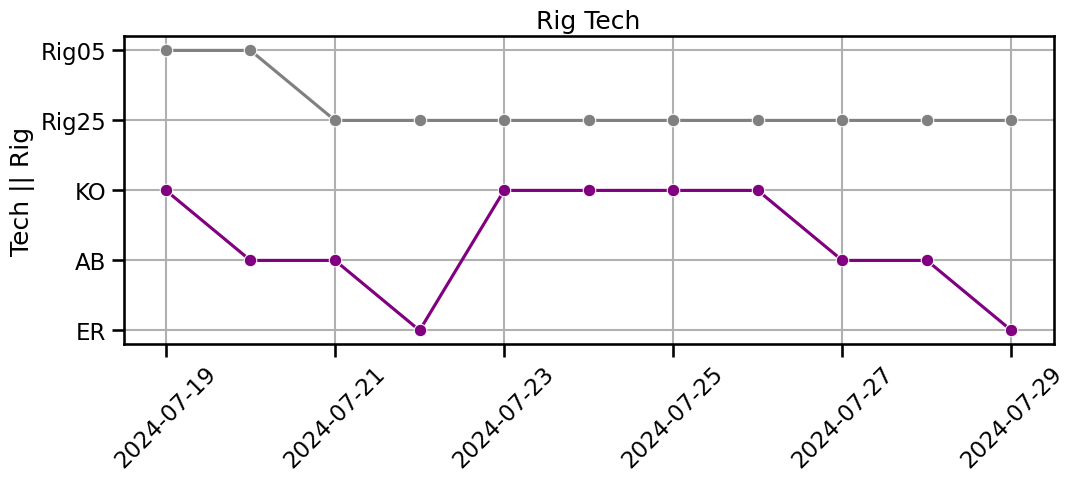

In [57]:
ax = None
rotate_x_labels = True
viz.plots.plot_rig_tech(
    days_df, ax=ax, title="Rig Tech", rotate_x_labels=rotate_x_labels
)

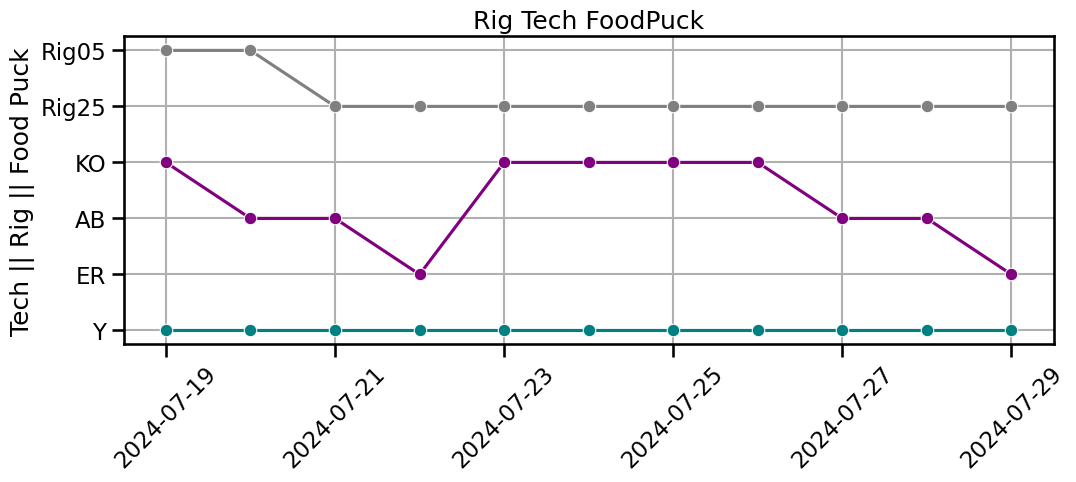

In [54]:
viz.plots.plot_rig_tech_foodpuck(
    days_df, ax=ax, title="Rig Tech FoodPuck", rotate_x_labels=rotate_x_labels
)

#### Curriculum & Give Type

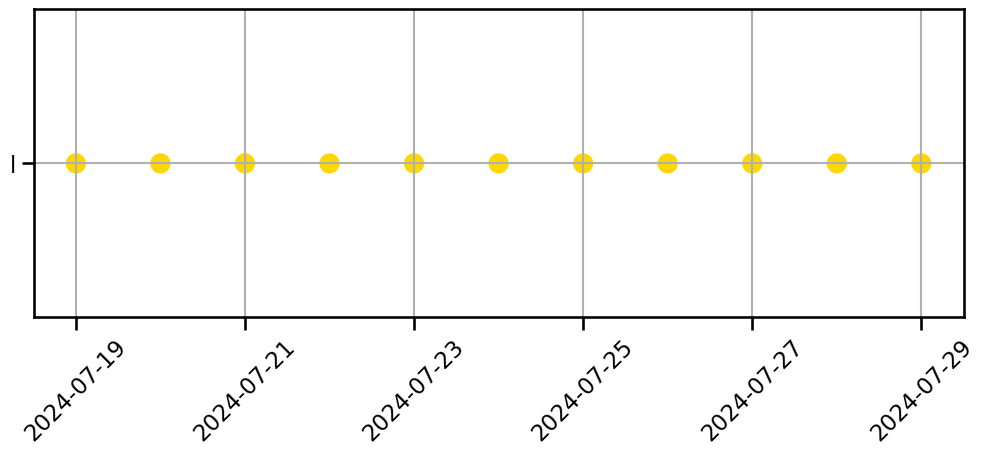

In [72]:
fig, ax = pu.make_fig()
viz.plots.plot_give_type_days(trials_df, ax=ax, rotate_x_labels=True)

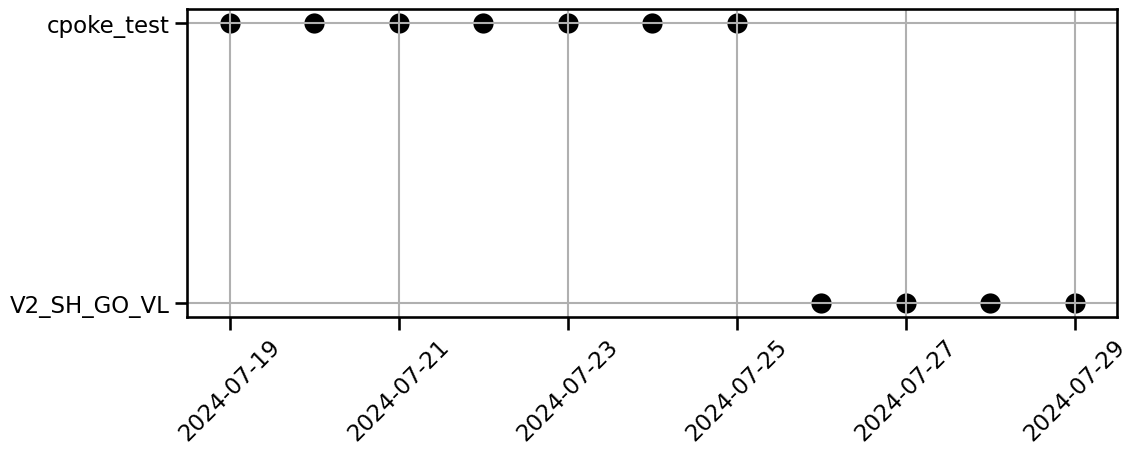

In [81]:
fig, ax = pu.make_fig()
viz.plots.plot_curriculum(trials_df, ax=ax, rotate_x_labels=True)

In [104]:
condition = trials_df.fix_experiment.iloc[-1]
print(var)

V2


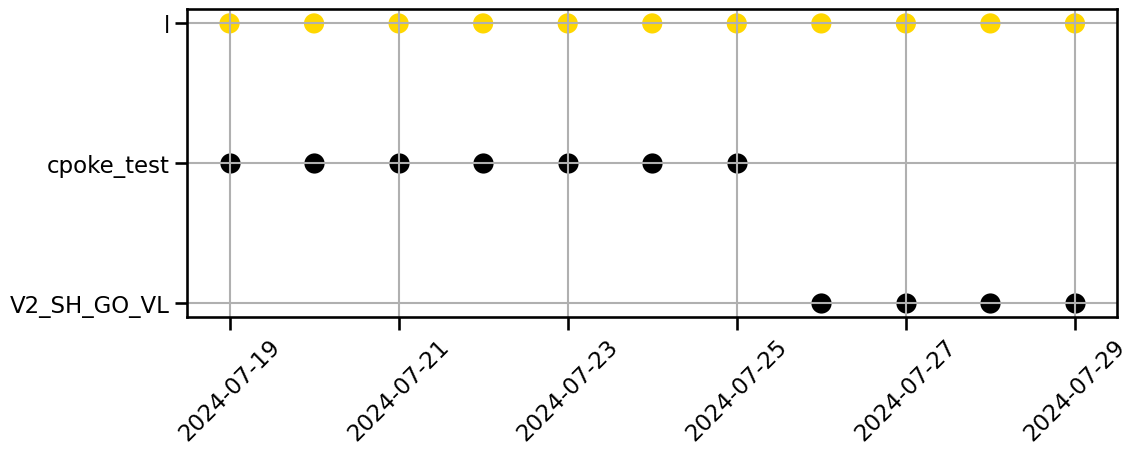

In [94]:
fig, ax = pu.make_fig()


viz.plots.plot_curriculum_and_give_types(trials_df, ax=ax, rotate_x_labels=True)


#### Cpoke Fix Stats

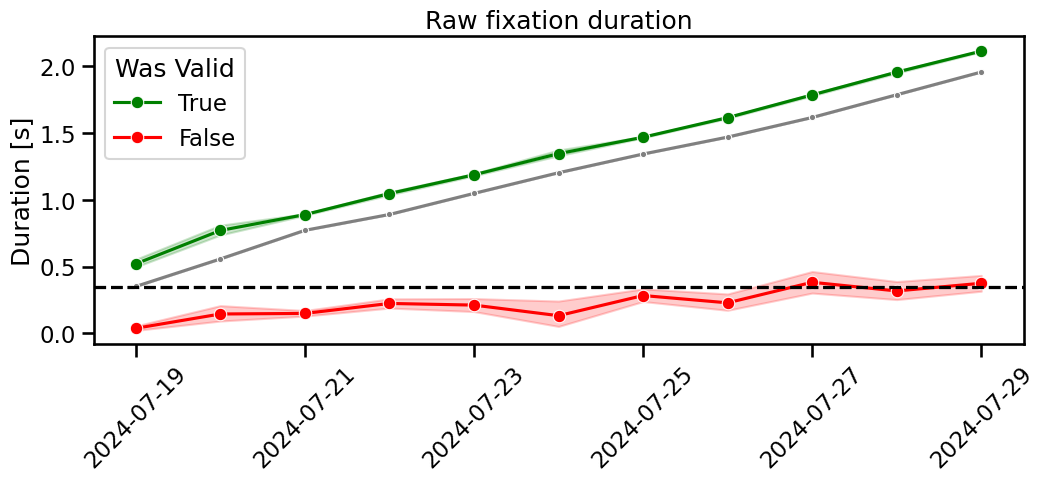

In [11]:
viz.FixationGrower.plots.plot_cpoke_fix_stats_raw(
    trials_df,
    title="Raw fixation duration",
    rotate_x_labels=True,
    legend=True,
)

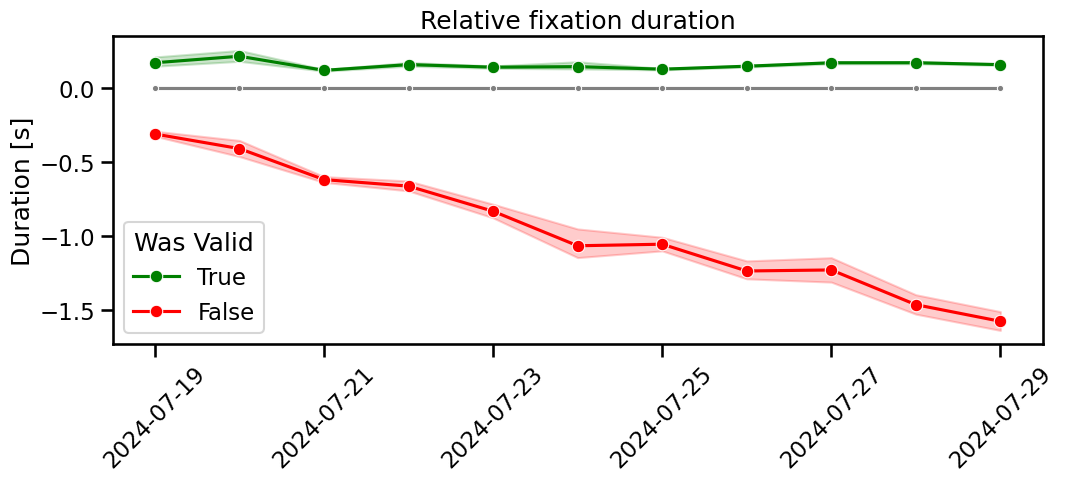

In [10]:
viz.FixationGrower.plots.plot_cpoke_fix_stats_relative(
    trials_df,
    title="Relative fixation duration",
    legend=True,
    rotate_x_labels=True,
)

### Trial Structure

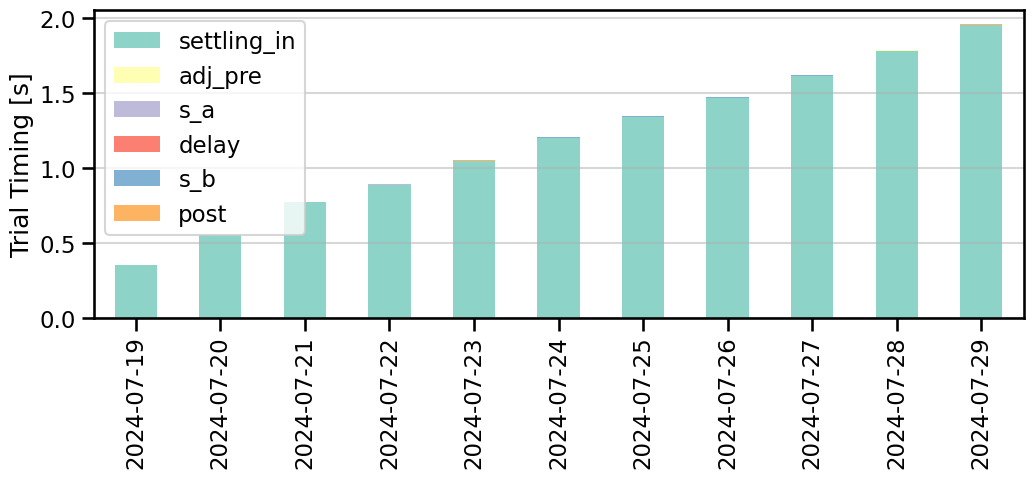

In [ ]:
viz.plot_days_info.plot_trial_structure(trials_df)

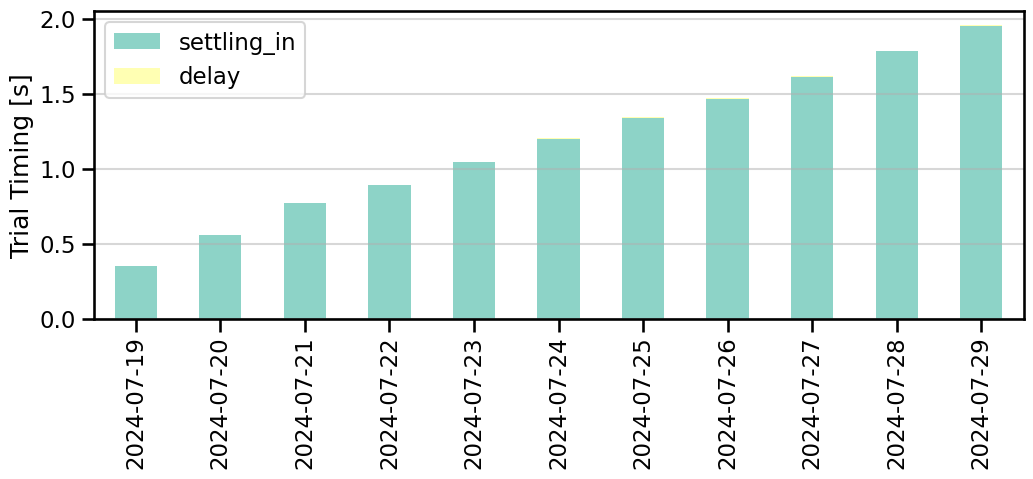

In [ ]:
viz.FixationGrower.plots.plot_trial_structure(trials_df.query("animal_id == 'R010'"))

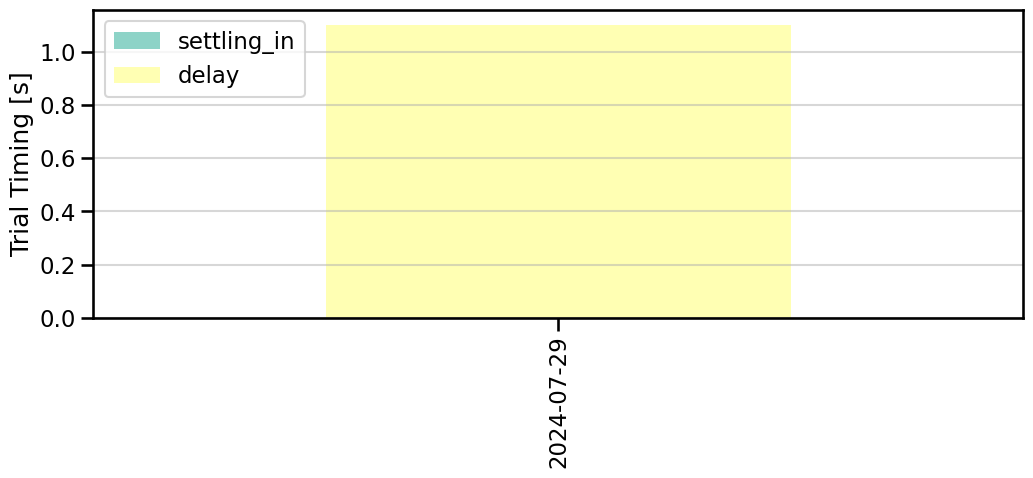

In [ ]:
viz.FixationGrower.plots.plot_trial_structure(r012_trials)

## Failure Rate

This varies by settings. If settling in determines fixation is the number of failed pokes. This could be if a trial had any failed pokes or it could be fully unraveled to the ratio of failed to successful pokes. (n_settling ins / n_trials). If settling in does not determines fixation, its just the violation rate.



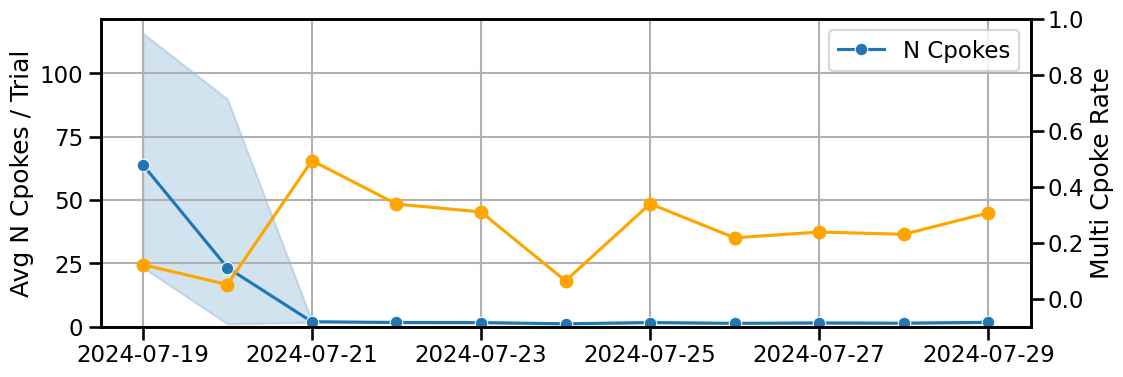

In [241]:
viz.plot_days_info.plot_n_cpokes_and_multirate(trials_df)

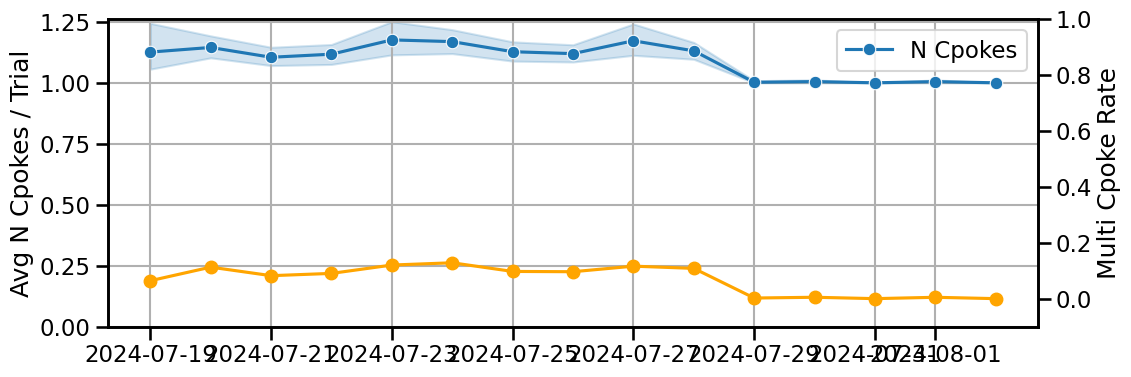

In [7]:
viz.plot_days_info.plot_n_cpokes_and_multirate(trials_df2)

In [27]:
by_trial = (r010_trials["n_settling_ins"] > 1).mean()

by_poke = 1 - (len(r010_trials) / r010_trials["n_settling_ins"].sum())

print(by_trial, by_poke)

0.19621026894865526 0.22390891840607208


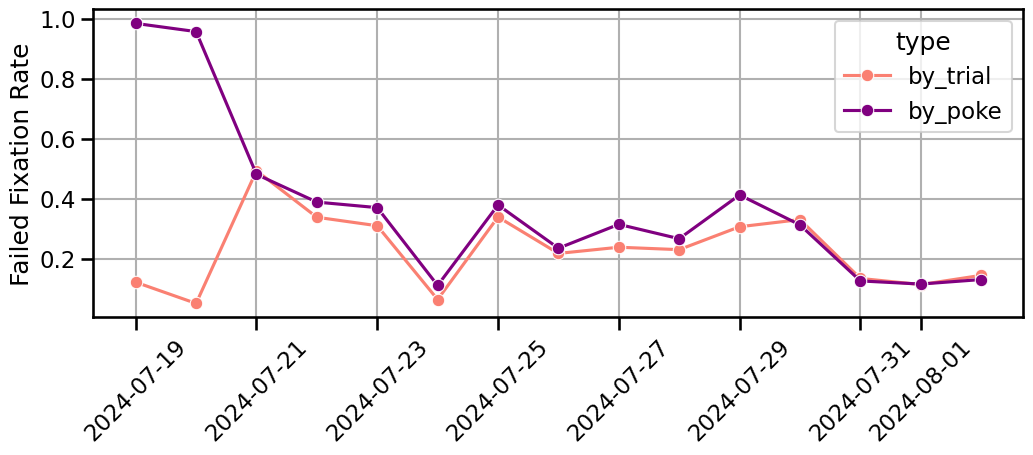

In [85]:
viz.plots.plot_failed_fixation_rate_penalty_off(trials_df, rotate_x_labels=True)

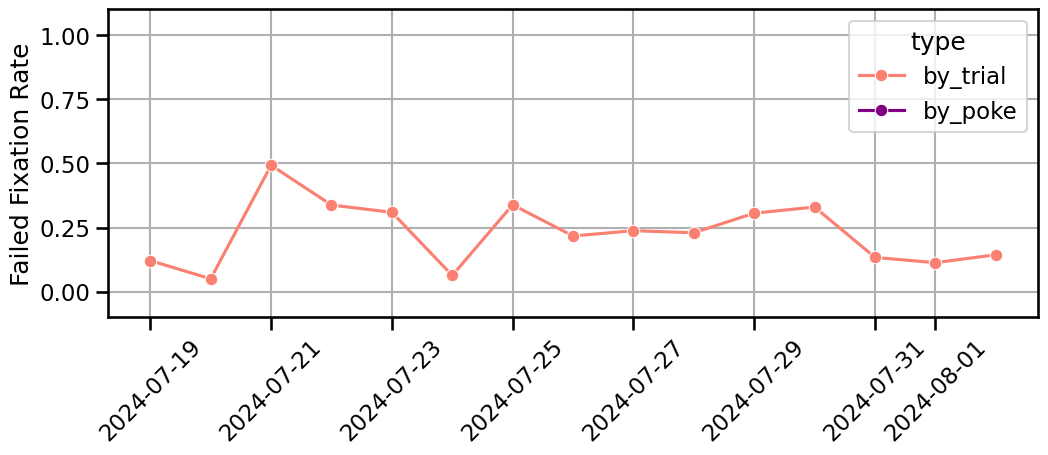

In [87]:
viz.plots.plot_failed_fixation_rate_penalty_off(
    trials_df, only_trial_failures=True, rotate_x_labels=True
)

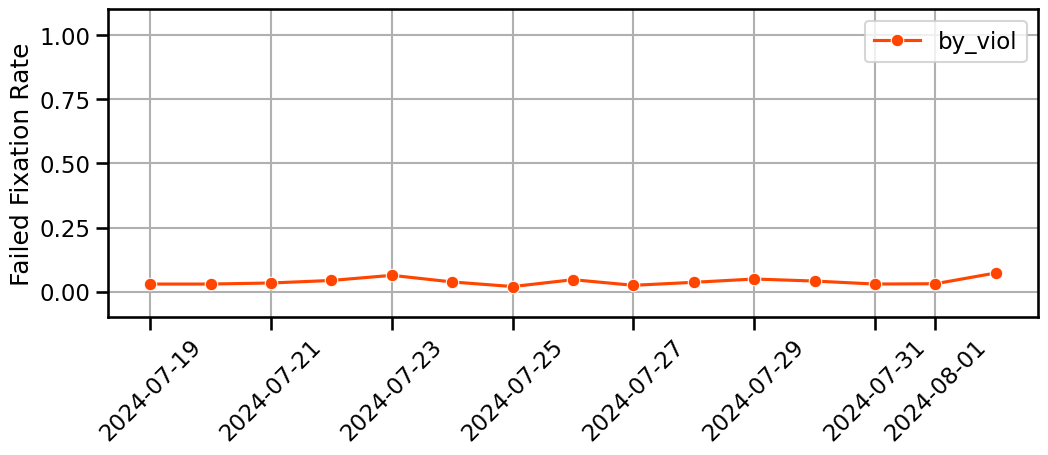

In [92]:
viz.plots.plot_failed_fixation_rate_penalty_on(trials_df2, rotate_x_labels=True)

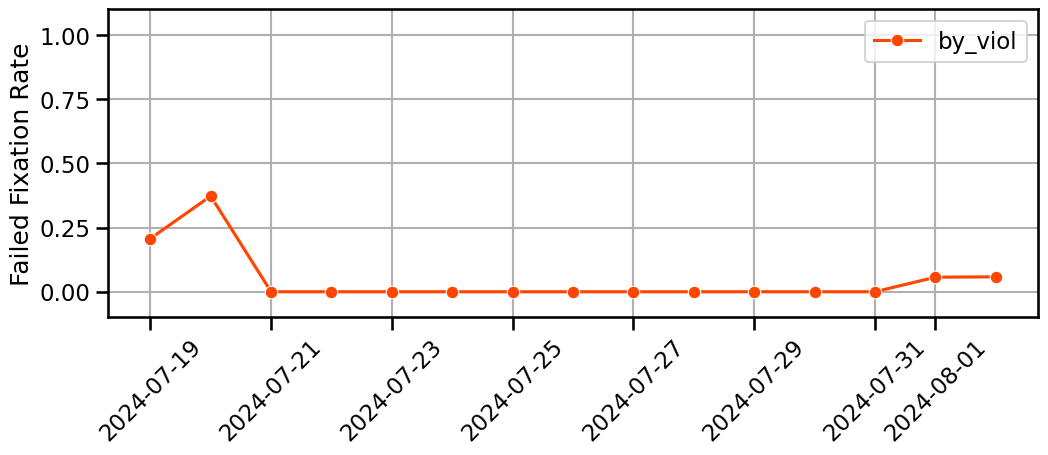

In [96]:
viz.FixationGrower.plots.plot_failed_fixation_rate(trials_df, rotate_x_labels=True)

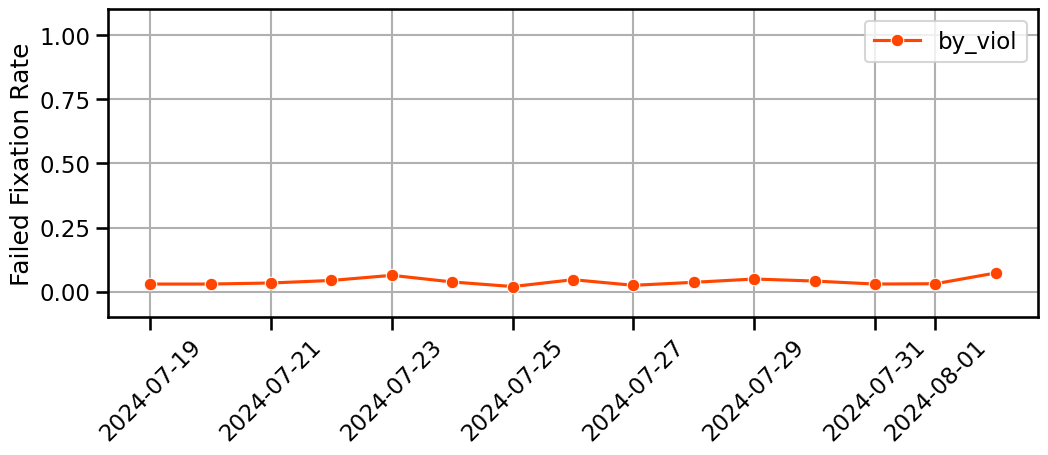

In [95]:
viz.FixationGrower.plots.plot_failed_fixation_rate(trials_df2, rotate_x_labels=True)

### N settling ins

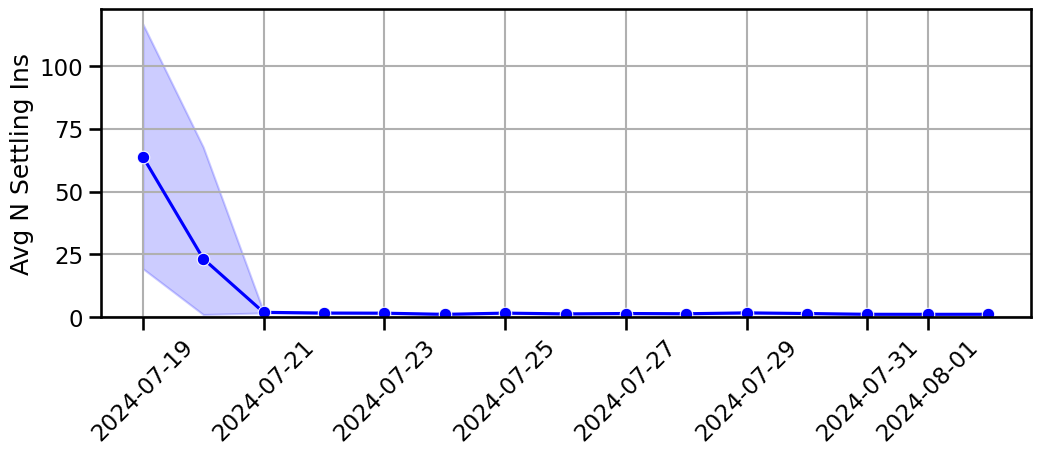

In [108]:
viz.plots.plot_n_settling_ins(trials_df, rotate_x_labels=True)

To document:

- trial structure plot for fixation grower and DMS
- penalty on/off plots for general
- nsettling in plots for general
- multicpoke plot for DMS
- failure rate plot for FG

---

# Summaries within days

Note R012 is on v1 (grow each trial, start low, violation early) while R010 is on V2 (grow overnight, start high, violation late). 

Most of these adaptations will be to account for V1.

In [8]:
r012_trials = ingest.create_trials_df.create_trials_df_from_dj(
    ["R012"], date_min="2024-07-29"
)

r010_trials = ingest.create_trials_df.create_trials_df_from_dj(
    ["R010"], date_min="2024-07-29"
)

animal_id R012
Fetched 5 dates from Sessions table from 2024-07-29 to 2024-08-02 for R012

animal_id R010
Fetched 5 dates from Sessions table from 2024-07-29 to 2024-08-02 for R010



## Single Plot Dev

Here is the current version of what is happening

skipping failed cpokes plots due to hist error


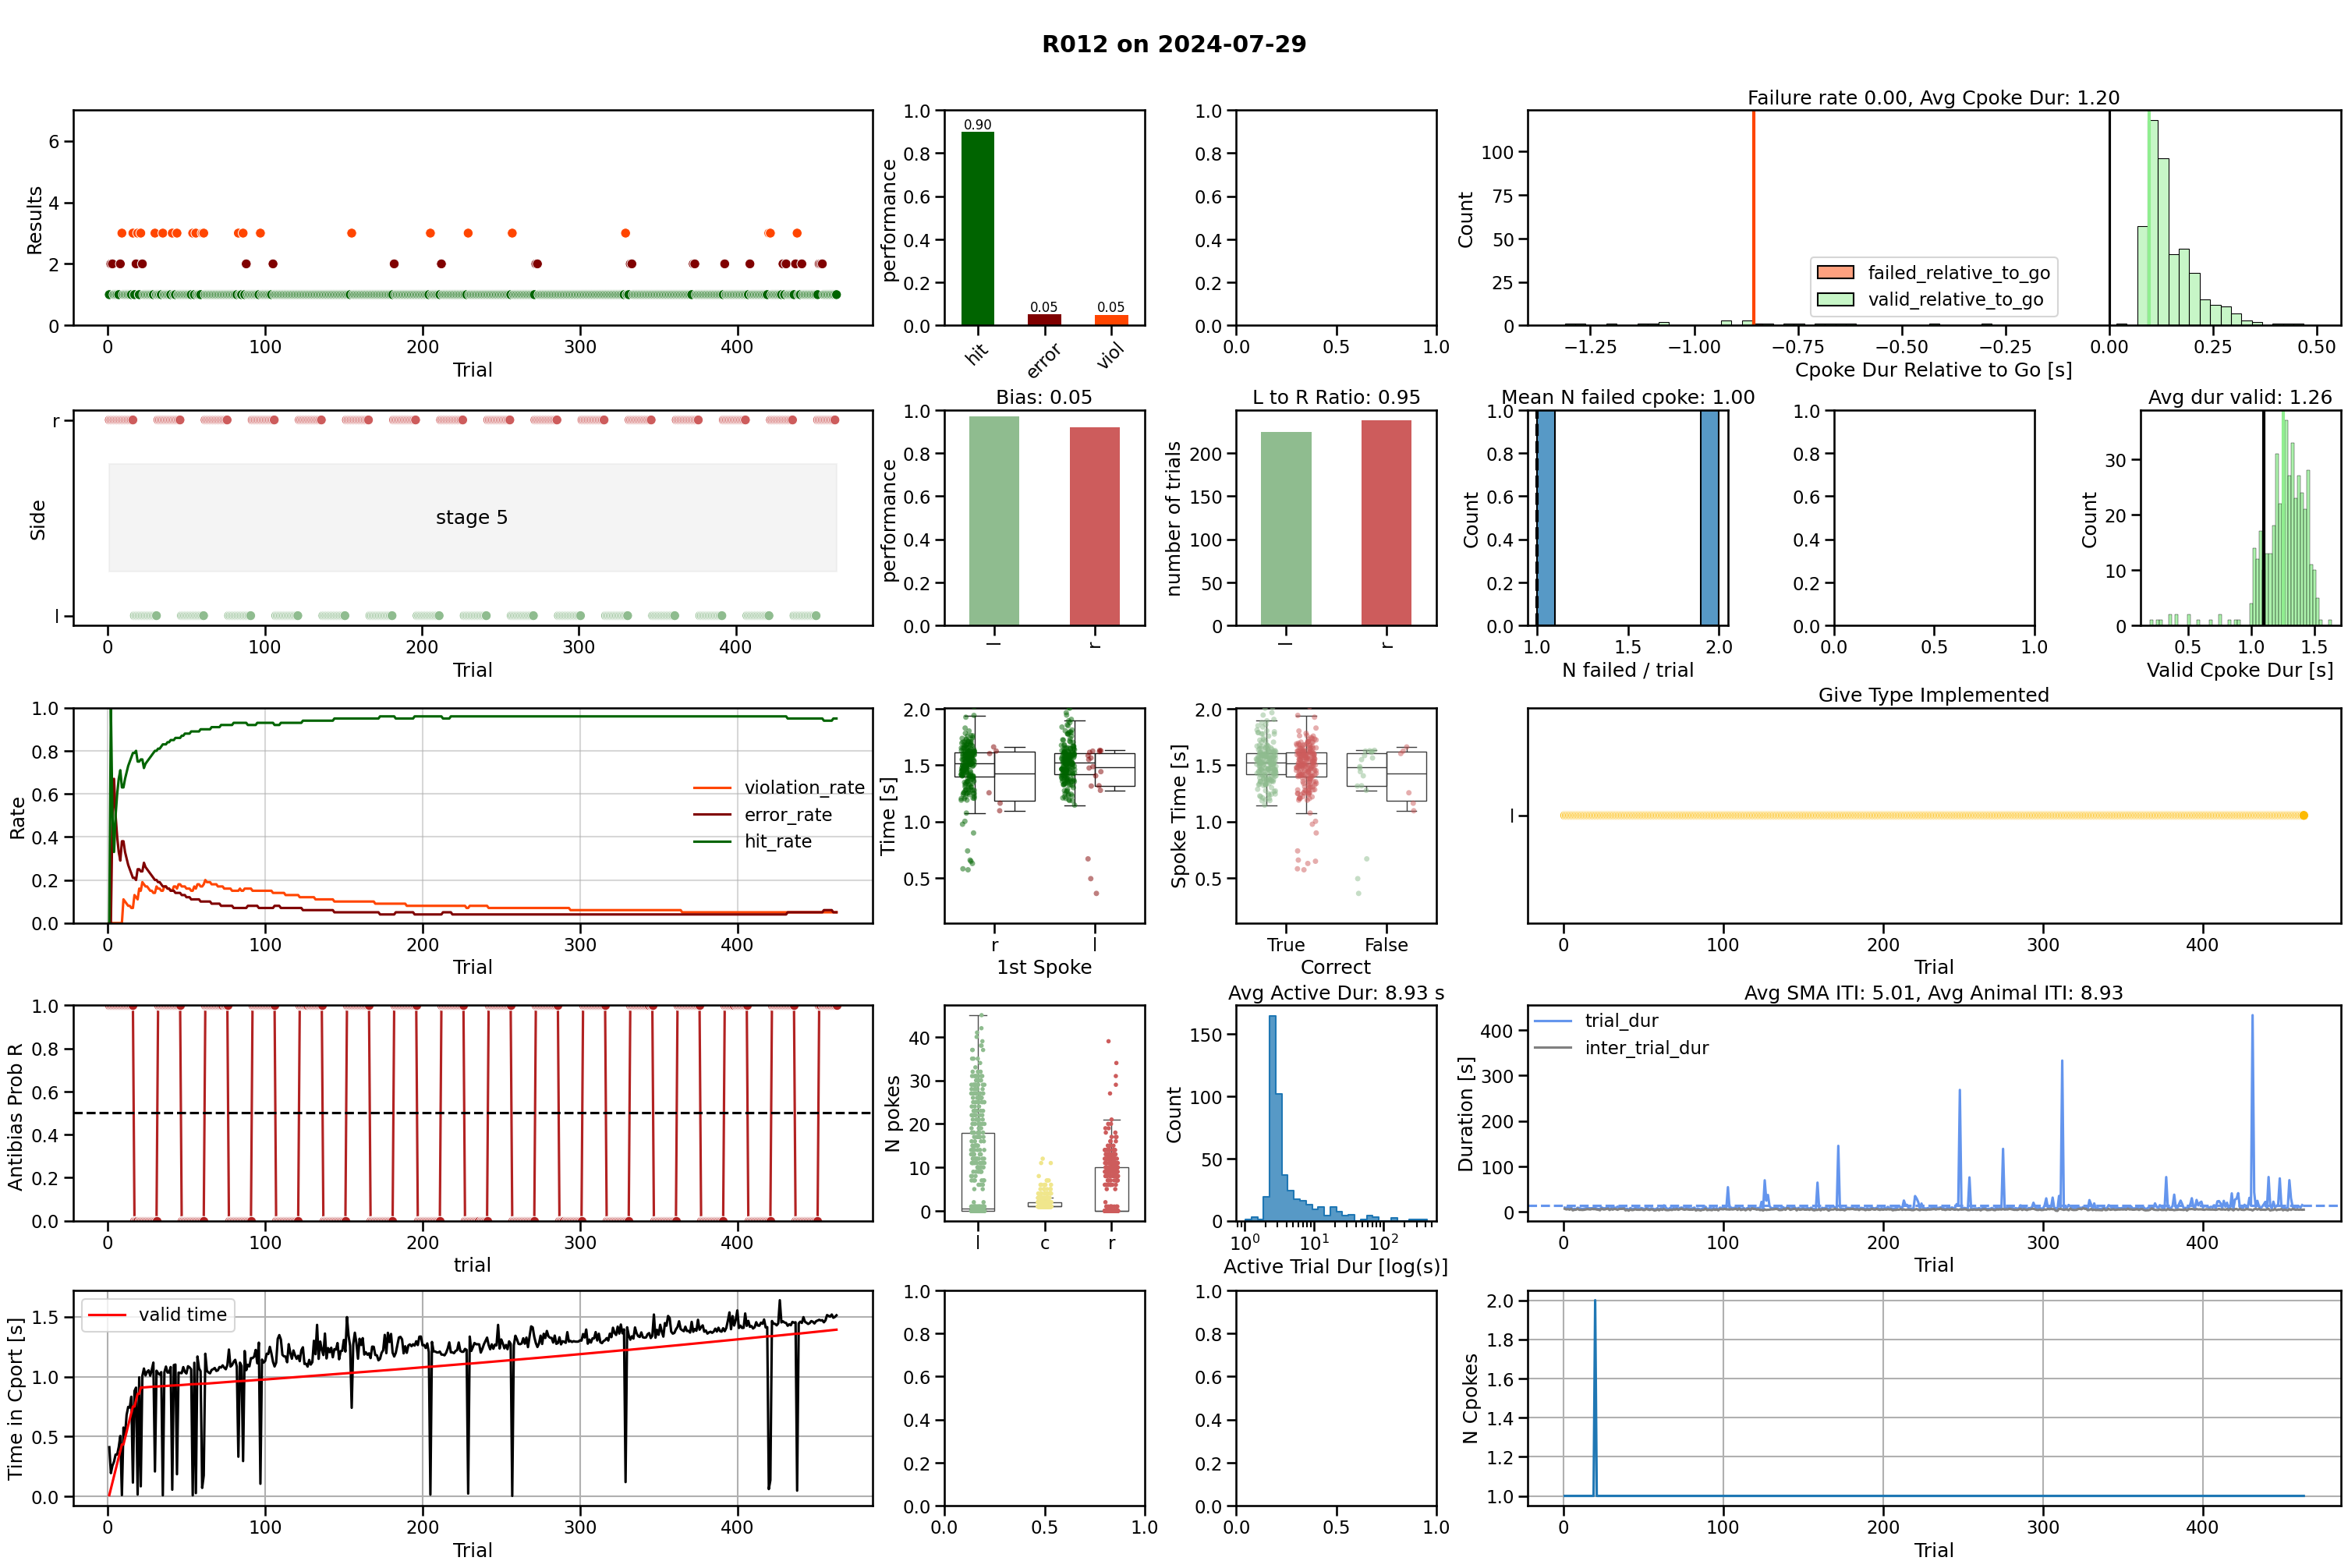

In [179]:
viz.DMS2.multiplots.multiplot_cpoke_pre_sounds(
    r012_trials, mode="settling_in", save_out=False
)

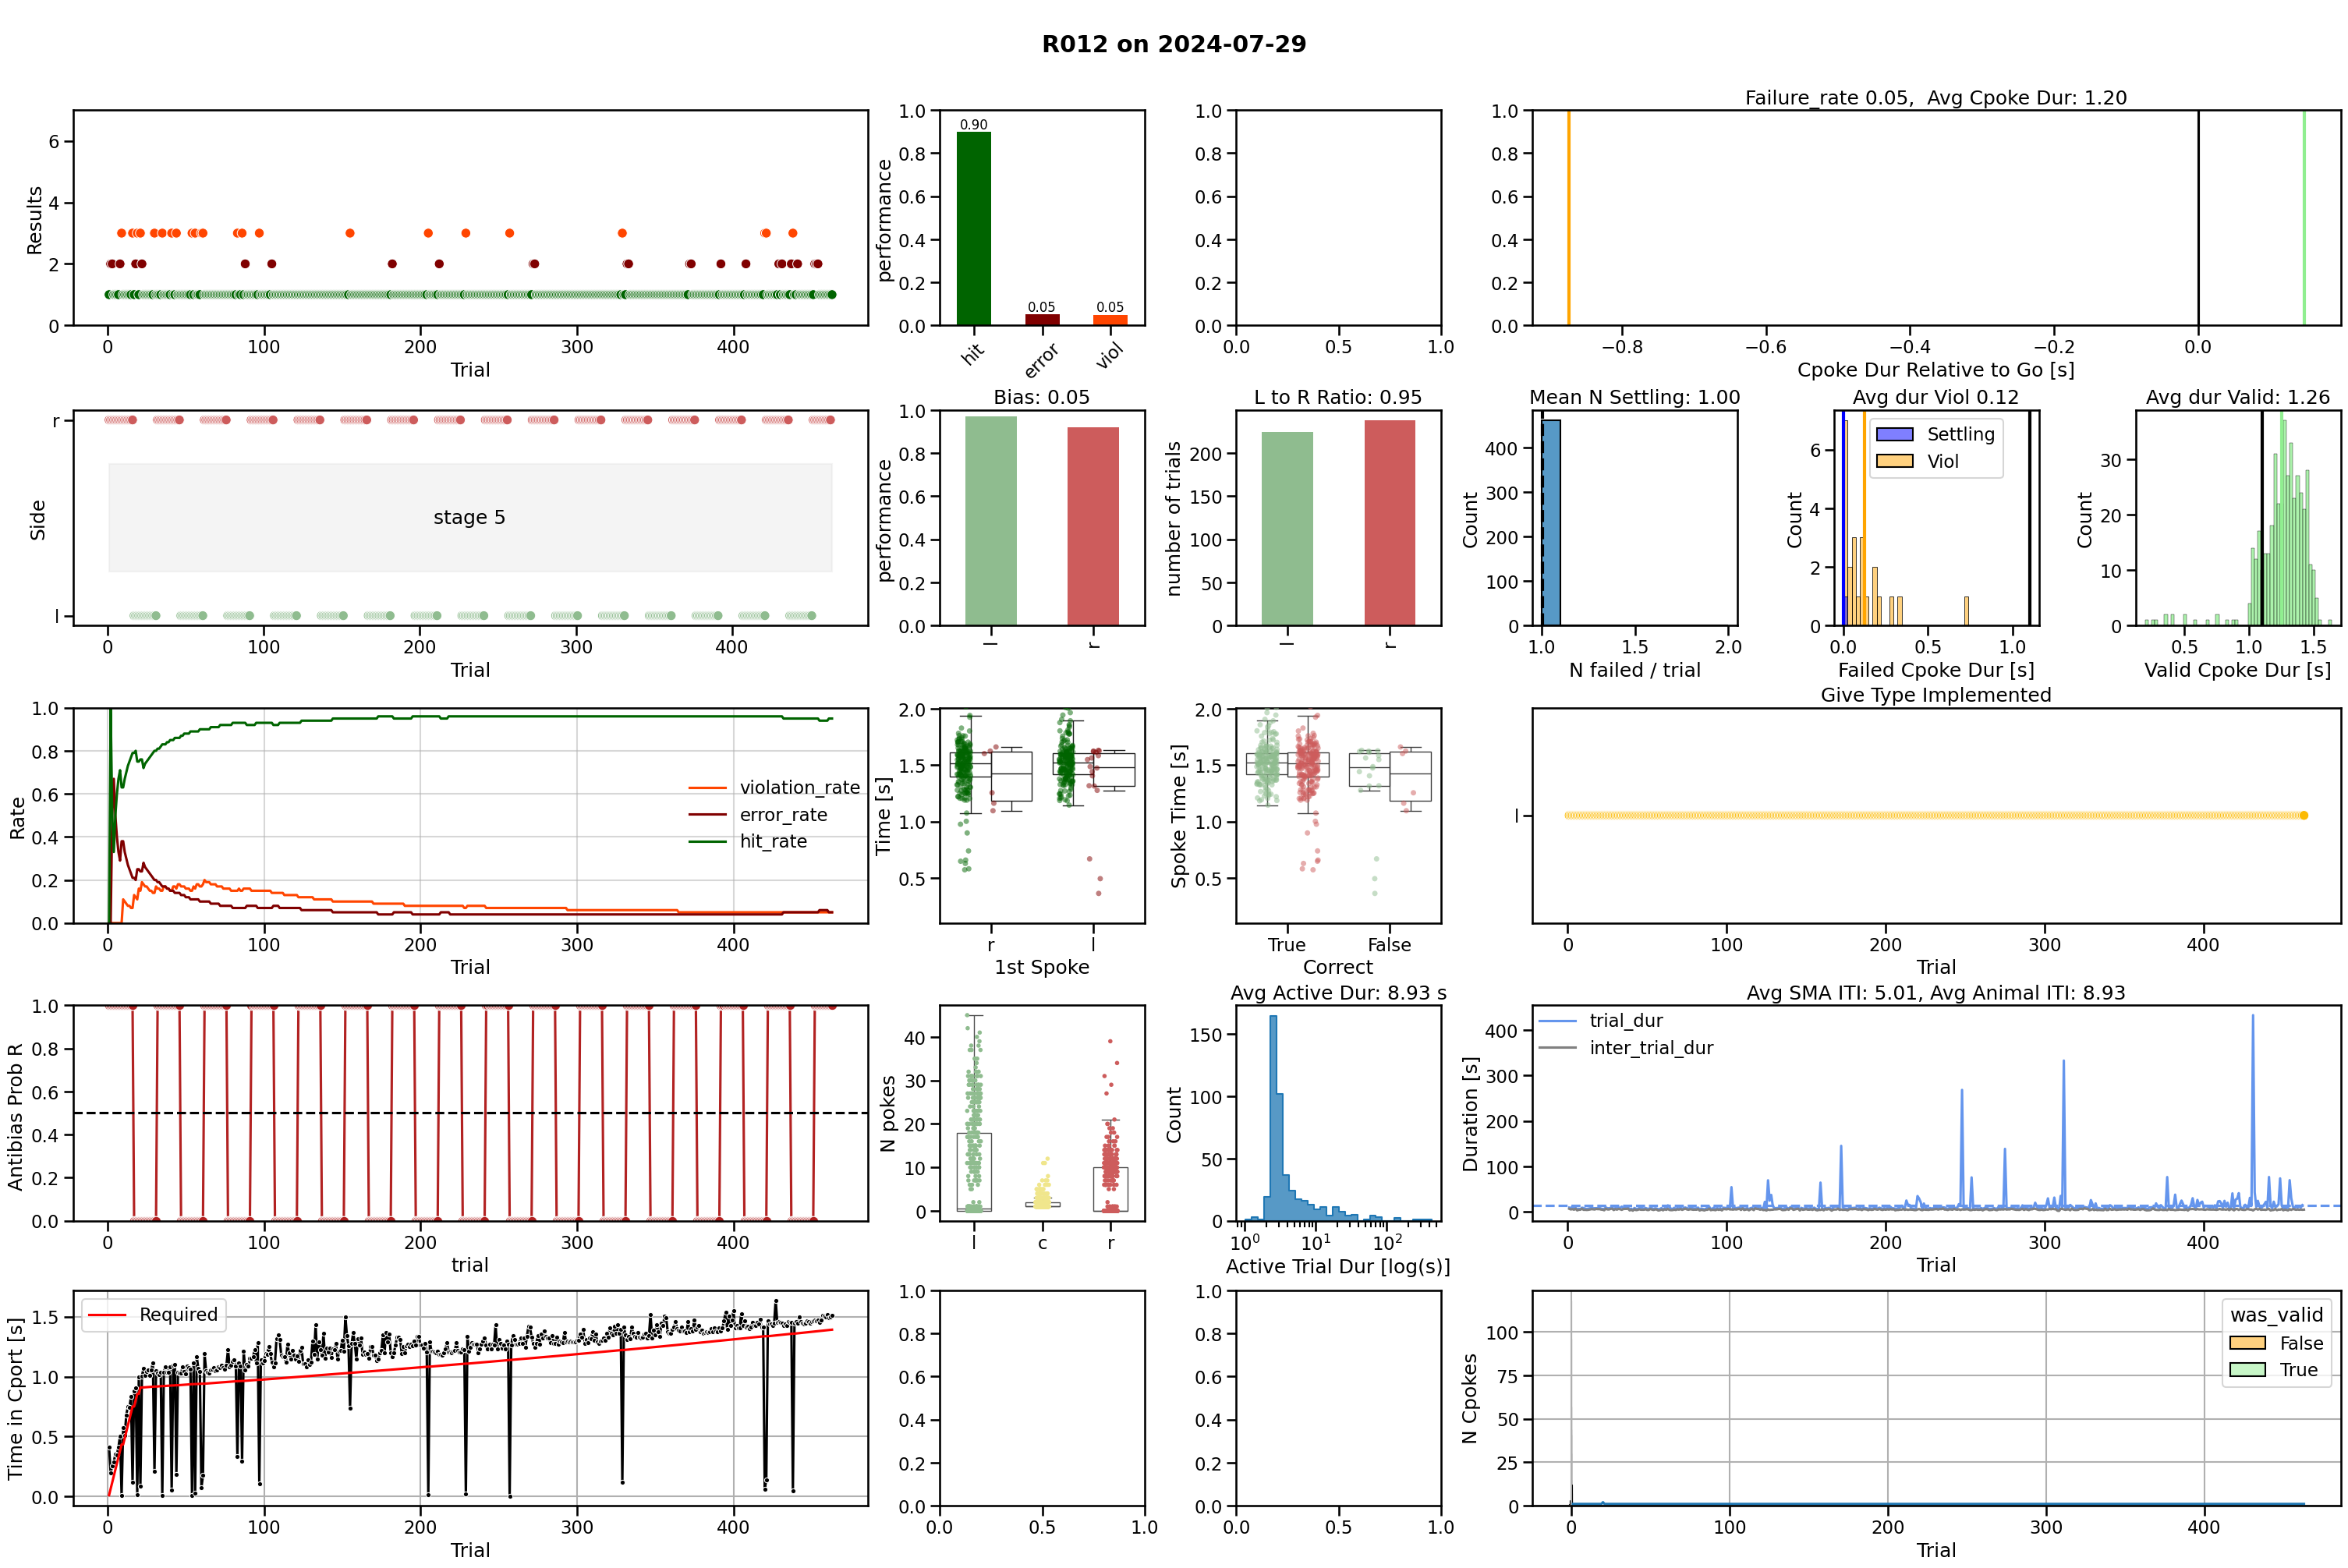

In [218]:
viz.FixationGrower.multiplots.multiplot_cpoke_learning(r012_trials, save_out=False)

#### Cpoke dur over trials

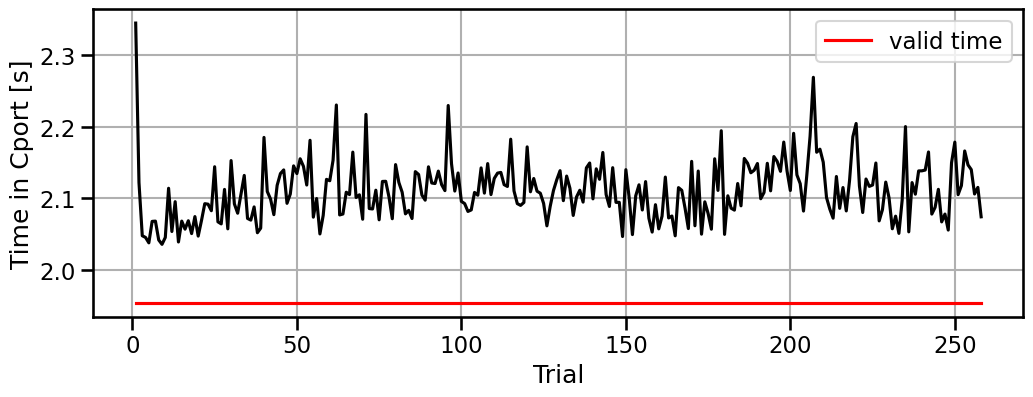

In [135]:
fig, ax = pu.make_fig()
viz.DMS2.plots.plot_cpoke_dur_over_trials(r010_trials, mode="settling_in", ax=ax)

New Version

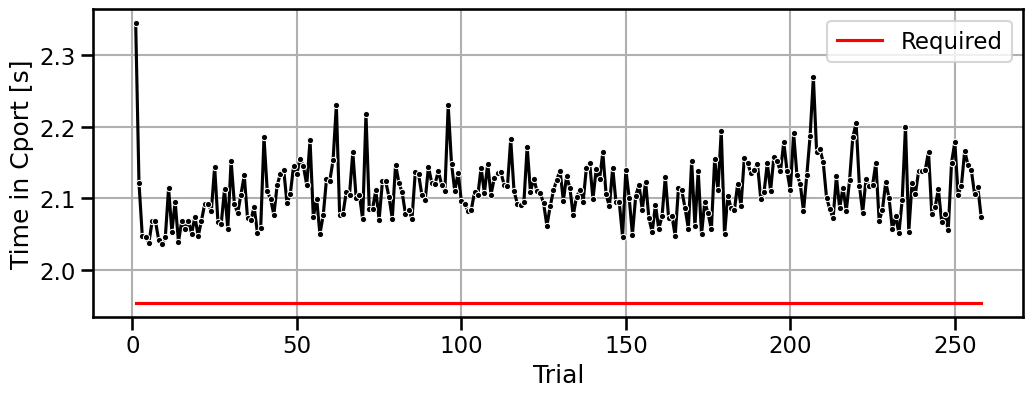

In [127]:
viz.FixationGrower.plots.plot_cpoke_dur_over_trials(sub_df)

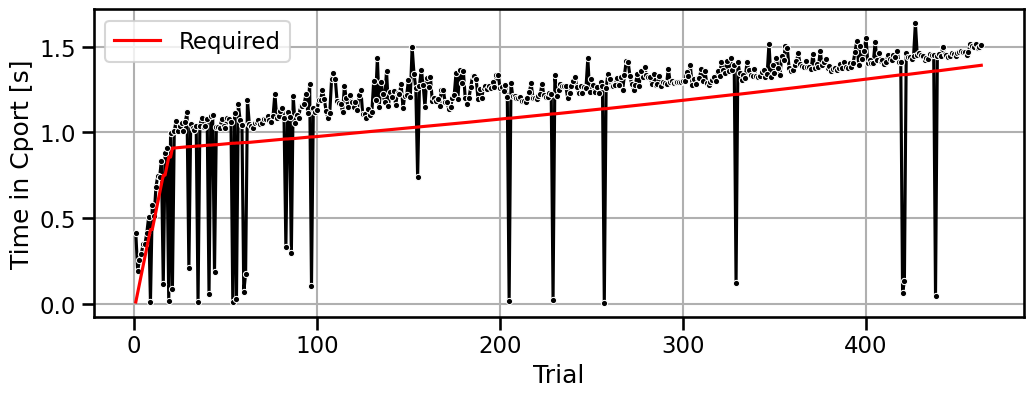

In [128]:
viz.FixationGrower.plots.plot_cpoke_dur_over_trials(r012_trials)

#### Cpoke dur relative to go

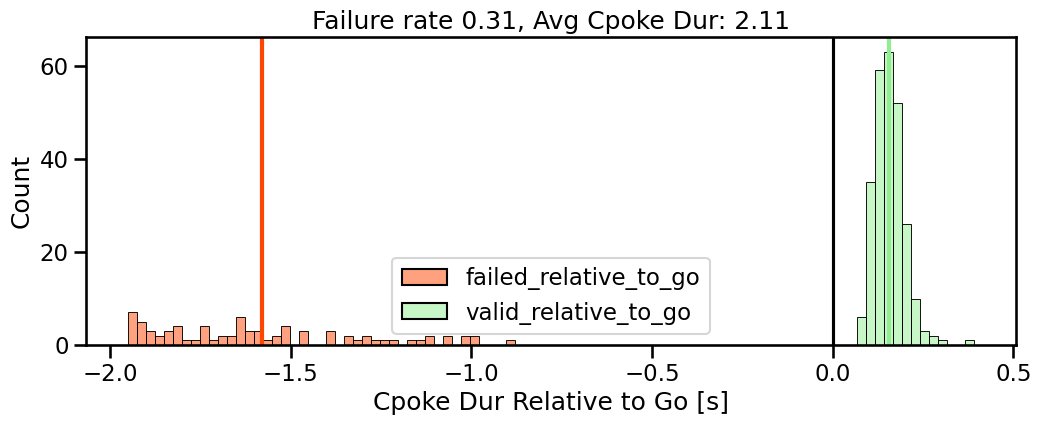

In [219]:
fig, ax = pu.make_fig()
viz.DMS2.plots.plot_cpoke_dur_distributions(r010_trials, ax=ax)

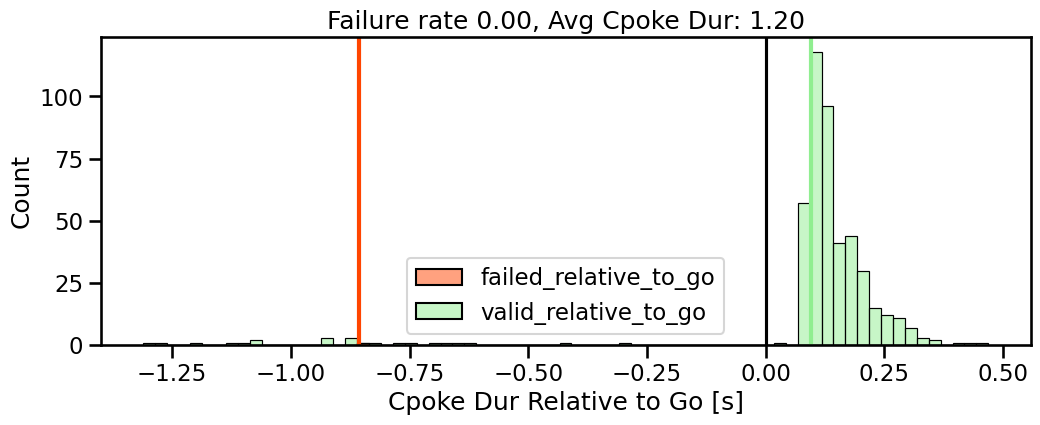

In [158]:
fig, ax = pu.make_fig()
viz.DMS2.plots.plot_cpoke_dur_distributions(r012_trials, ax=ax)

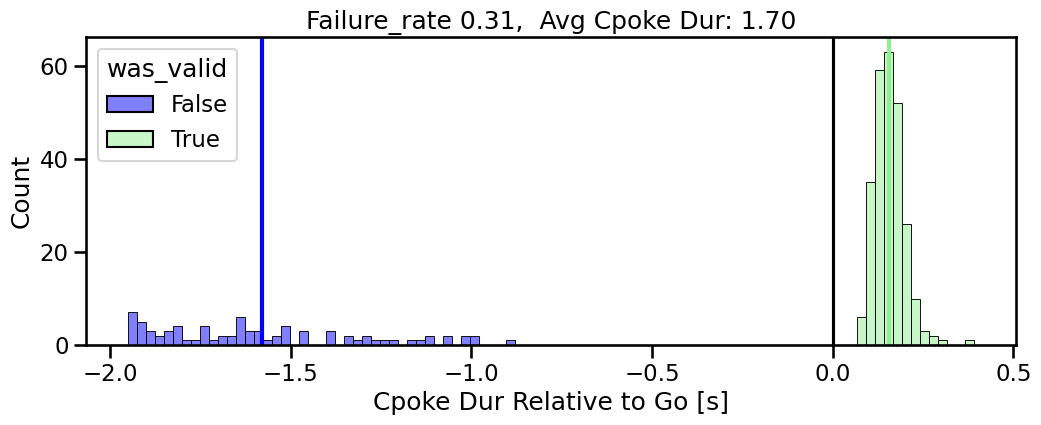

In [175]:
viz.FixationGrower.plots.plot_cpoke_dur_distributions(r010_trials)

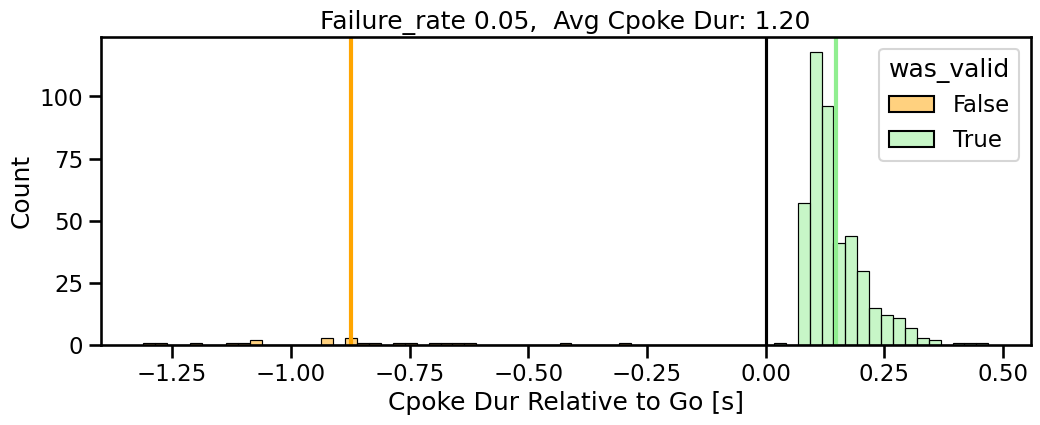

In [176]:
viz.FixationGrower.plots.plot_cpoke_dur_distributions(r012_trials)

#### Cpoke dur histograms
Old way:

In [207]:
def dms_hist_wrapper(trials_df, mode):

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    viz.plot_trials_info.plot_n_settling_ins(trials_df, ax=ax[0])
    viz.DMS2.plots.plot_avg_failed_cpoke_dur(trials_df, ax=ax[1], mode=mode)
    viz.DMS2.plots.plot_avg_valid_cpoke_dur(trials_df, ax=ax[2], mode=mode)

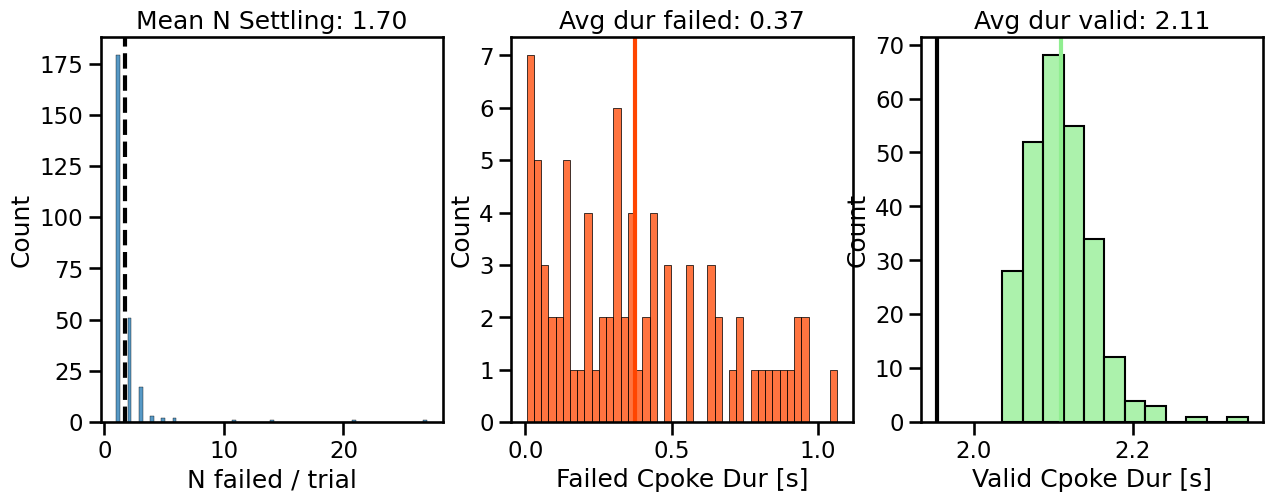

In [205]:
dms_hist_wrapper(r010_trials, mode="settling_in")

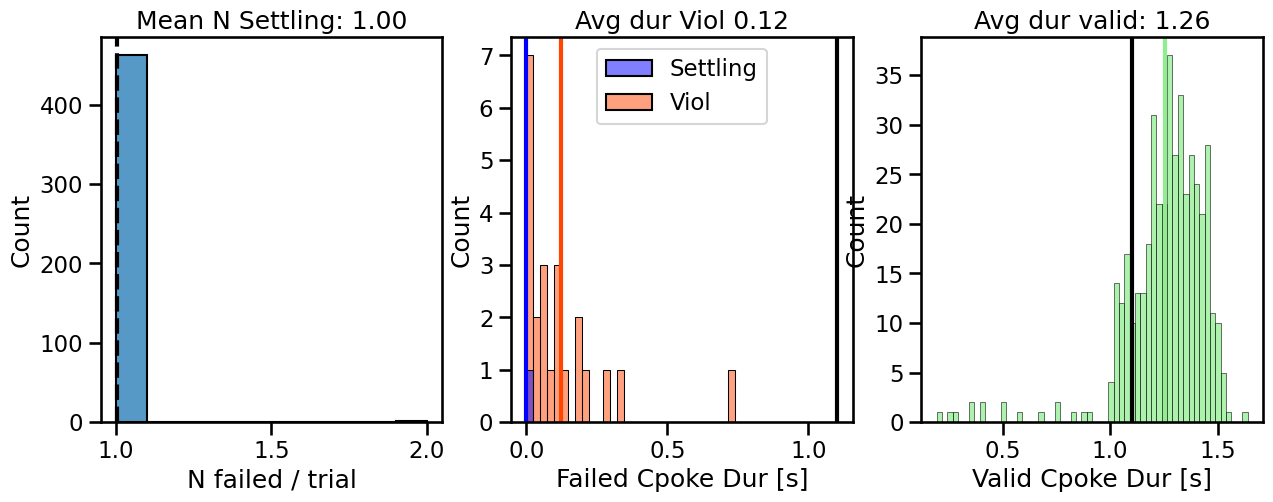

In [226]:
dms_hist_wrapper(r012_trials, mode="violations")

New way:

In [211]:
def fg_hist_wrapper(trials_df):

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    viz.plot_trials_info.plot_n_settling_ins(trials_df, ax=ax[0])
    viz.FixationGrower.plots.plot_avg_failed_cpoke_dur(trials_df, ax=ax[1])
    viz.FixationGrower.plots.plot_avg_valid_cpoke_dur(trials_df, ax=ax[2])

In [223]:
viz.FixationGrower.plots.plot_avg_valid_cpoke_dur?

Signature:
viz.FixationGrower.plots.plot_avg_valid_cpoke_dur(
    trials_df: pandas.core.frame.DataFrame,
    ax: matplotlib.axes._axes.Axes = None,
)
Docstring:
plot avg valid cpoke dur for per trial

params
------
trials_df : DataFrame
    trials dataframe with columns
    `cpoke_dur` and `violations`
    with trials as row index
ax : matplotlib.axes, optional
    axis to plot to
File:      ~/Desktop/github/jbreda_animal_training/src/behav_viz/visualize/FixationGrower/plots.py
Type:      function

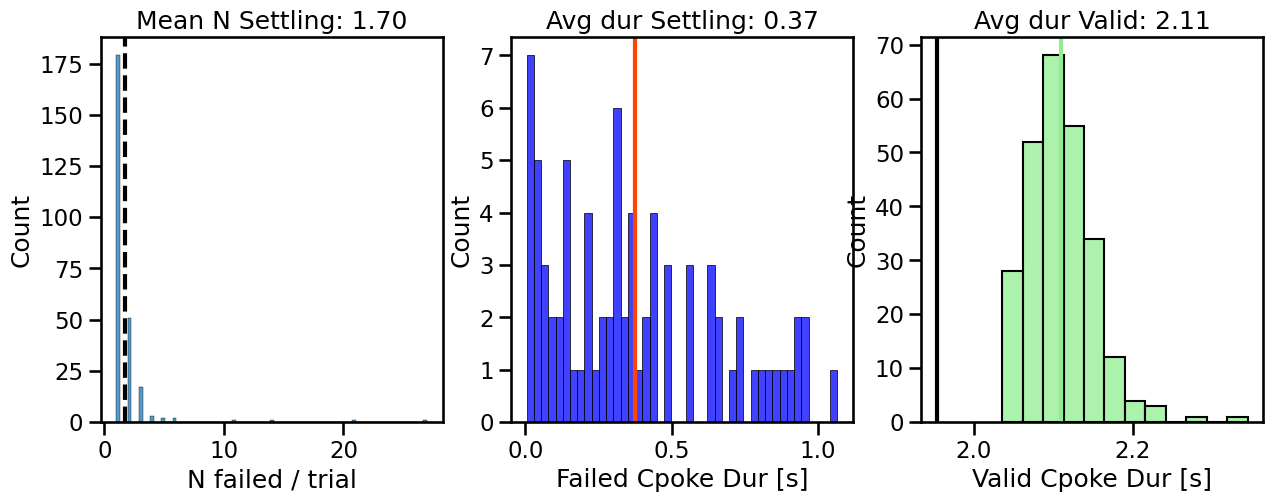

In [215]:
fg_hist_wrapper(r010_trials)

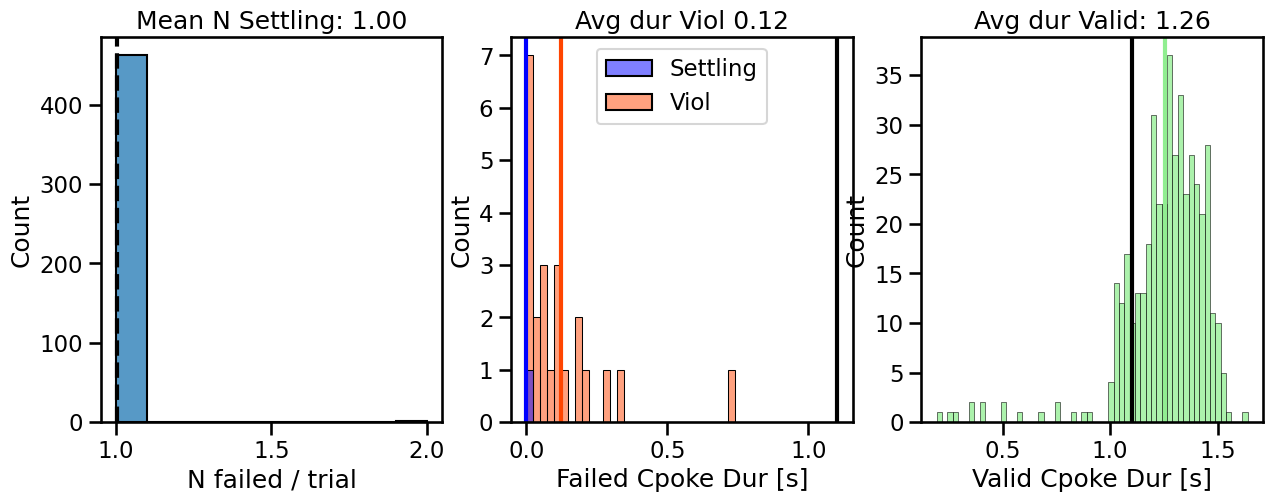

In [220]:
fg_hist_wrapper(r012_trials)2